In [128]:
import pandas as pd
import imblearn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [129]:
df = pd.read_csv("./train_satisfaction.csv")

In [130]:
df.head()

id  Пол  Возраст Путешествует с детьми Путешествует по работе  \
0  23224169  муж       28                   нет                     да   
1  34061233  муж       51                    да                    нет   
2  72412002  жен       36                   нет                     да   
3  39685985  жен       58                    да                     да   
4  37903434  жен       46                   нет                    нет   

        Тип  Расстояние  Покупка билета онлайн  Питание включено  \
0      купе        2415                      1                 0   
1  плацкарт         973                      1                 0   
2  плацкарт        1416                      1                 1   
3        св         703                      1                 0   
4  плацкарт         162                      1                 1   

   Наличие wifi  Оценка комфортности места  Оценка качества уборки  \
0             1                          4                       4   
1             1                          4                       4   
2             0                          2                       2   
3             1                          3                       3   
4             1                          1                       2   

   Оценка качества обслуживания в пути  Удовлетворён предоставленной услугой  
0                                    3                                     1  
1                                    5                                     1  
2                                    3                                     1  
3                                    2                                     1  
4                                    3                                     1

In [131]:
df.tail()

id  Пол  Возраст Путешествует с детьми Путешествует по работе  \
6995  63736898  муж       43                   нет                     да   
6996  59737177  муж       46                   нет                    нет   
6997  94968423  жен       67                   нет                    нет   
6998  74214609  жен       21                   нет                     да   
6999  63859956  муж       36                   нет                    нет   

           Тип  Расстояние  Покупка билета онлайн  Питание включено  \
6995  плацкарт         146                      1                 1   
6996      купе        1875                      1                 0   
6997  плацкарт         440                      1                 0   
6998        св        3769                      1                 0   
6999  плацкарт         403                      1                 0   

      Наличие wifi  Оценка комфортности места  Оценка качества уборки  \
6995             0                          3                       3   
6996             0                          5                       5   
6997             0                          5                       4   
6998             0                          3                       3   
6999             0                          3                       3   

      Оценка качества обслуживания в пути  \
6995                                    1   
6996                                    4   
6997                                    3   
6998                                    4   
6999                                    2   

      Удовлетворён предоставленной услугой  
6995                                     1  
6996                                     1  
6997                                     1  
6998                                     1  
6999                                     1

In [132]:
df.describe()

id      Возраст   Расстояние  Покупка билета онлайн  \
count  7.000000e+03  7000.000000  7000.000000            7000.000000   
mean   5.076190e+07    42.262571   852.252143               0.952143   
std    2.902256e+07    14.173195   635.883952               0.213479   
min    2.591000e+03    18.000000   104.000000               0.000000   
25%    2.599330e+07    30.000000   406.000000               1.000000   
50%    5.132753e+07    42.000000   678.000000               1.000000   
75%    7.573081e+07    53.000000  1065.000000               1.000000   
max    9.999992e+07    80.000000  4539.000000               1.000000   

       Питание включено  Наличие wifi  Оценка комфортности места  \
count       7000.000000   7000.000000                7000.000000   
mean           0.611286      0.544286                   3.156429   
std            0.487493      0.498070                   1.350954   
min            0.000000      0.000000                   1.000000   
25%            0.000000      0.000000                   2.000000   
50%            1.000000      1.000000                   3.000000   
75%            1.000000      1.000000                   4.000000   
max            1.000000      1.000000                   5.000000   

       Оценка качества уборки  Оценка качества обслуживания в пути  \
count             7000.000000                          7000.000000   
mean                 3.127429                             3.240429   
std                  1.344095                             0.938482   
min                  1.000000                             1.000000   
25%                  2.000000                             3.000000   
50%                  3.000000                             3.000000   
75%                  4.000000                             4.000000   
max                  5.000000                             5.000000   

       Удовлетворён предоставленной услугой  
count                           7000.000000  
mean                               0.865857  
std                                0.340830  
min                                0.000000  
25%                                1.000000  
50%                                1.000000  
75%                                1.000000  
max                                1.000000

<Axes: xlabel='Удовлетворён предоставленной услугой'>

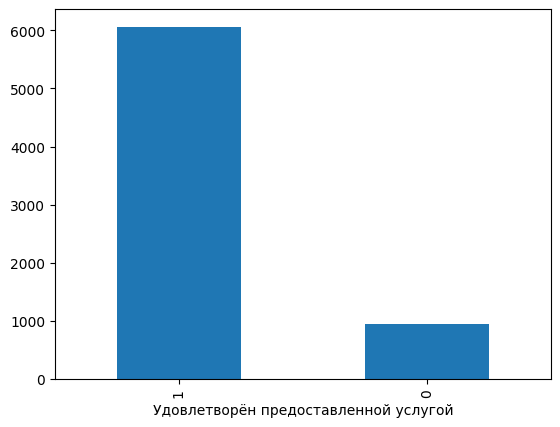

In [133]:
df['Удовлетворён предоставленной услугой'].value_counts().plot(kind='bar')

У нас дисбаланс классов на графике выше!!!

In [134]:
df = df.set_index('id')

In [135]:
df.head()

Пол  Возраст Путешествует с детьми Путешествует по работе       Тип  \
id                                                                              
23224169  муж       28                   нет                     да      купе   
34061233  муж       51                    да                    нет  плацкарт   
72412002  жен       36                   нет                     да  плацкарт   
39685985  жен       58                    да                     да        св   
37903434  жен       46                   нет                    нет  плацкарт   

          Расстояние  Покупка билета онлайн  Питание включено  Наличие wifi  \
id                                                                            
23224169        2415                      1                 0             1   
34061233         973                      1                 0             1   
72412002        1416                      1                 1             0   
39685985         703                      1                 0             1   
37903434         162                      1                 1             1   

          Оценка комфортности места  Оценка качества уборки  \
id                                                            
23224169                          4                       4   
34061233                          4                       4   
72412002                          2                       2   
39685985                          3                       3   
37903434                          1                       2   

          Оценка качества обслуживания в пути  \
id                                              
23224169                                    3   
34061233                                    5   
72412002                                    3   
39685985                                    2   
37903434                                    3   

          Удовлетворён предоставленной услугой  
id                                              
23224169                                     1  
34061233                                     1  
72412002                                     1  
39685985                                     1  
37903434                                     1

In [136]:
df.count()

Пол                                     7000
Возраст                                 7000
Путешествует с детьми                   7000
Путешествует по работе                  7000
Тип                                     7000
Расстояние                              7000
Покупка билета онлайн                   7000
Питание включено                        7000
Наличие wifi                            7000
Оценка комфортности места               7000
Оценка качества уборки                  7000
Оценка качества обслуживания в пути     7000
Удовлетворён предоставленной услугой    7000
dtype: int64

In [137]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [138]:
X = df.drop(['Удовлетворён предоставленной услугой'], axis=1)
y = df['Удовлетворён предоставленной услугой']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split( \
    X, \
    y, \
    stratify=y, \
    random_state=RANDOM_STATE, \
    test_size=TEST_SIZE,
)

In [141]:
cols_ohe = X_train.select_dtypes('object').columns
cols_ohe

Index(['Пол', 'Путешествует с детьми', 'Путешествует по работе', 'Тип'], dtype='object')

In [142]:
from sklearn.preprocessing import OneHotEncoder

In [143]:
oh_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [144]:
oh_encoder.fit(X_train[cols_ohe])

OneHotEncoder(drop='first', sparse_output=False)

In [145]:
encoder_col_names = oh_encoder.get_feature_names_out().tolist()

In [146]:
X_train[encoder_col_names] = oh_encoder.transform(X_train[cols_ohe])
X_test[encoder_col_names] = oh_encoder.transform(X_test[cols_ohe])
X_train.head()

Пол  Возраст Путешествует с детьми Путешествует по работе       Тип  \
id                                                                              
40366660  муж       39                    да                     да  плацкарт   
30521827  муж       24                   нет                    нет  плацкарт   
79417276  муж       60                   нет                     да      купе   
58392972  жен       29                   нет                     да      купе   
85633462  муж       58                   нет                     да      купе   

          Расстояние  Покупка билета онлайн  Питание включено  Наличие wifi  \
id                                                                            
40366660         752                      1                 1             1   
30521827         147                      1                 0             0   
79417276         898                      1                 1             1   
58392972         375                      1                 1             0   
85633462         303                      1                 1             1   

          Оценка комфортности места  Оценка качества уборки  \
id                                                            
40366660                          1                       5   
30521827                          4                       4   
79417276                          3                       3   
58392972                          1                       1   
85633462                          3                       3   

          Оценка качества обслуживания в пути  Пол_муж  \
id                                                       
40366660                                    3      1.0   
30521827                                    2      1.0   
79417276                                    2      1.0   
58392972                                    3      0.0   
85633462                                    3      1.0   

          Путешествует с детьми_нет  Путешествует по работе_нет  Тип_плацкарт  \
id                                                                              
40366660                        0.0                         0.0           1.0   
30521827                        1.0                         1.0           1.0   
79417276                        1.0                         0.0           0.0   
58392972                        1.0                         0.0           0.0   
85633462                        1.0                         0.0           0.0   

          Тип_св  
id                
40366660     0.0  
30521827     0.0  
79417276     0.0  
58392972     0.0  
85633462     0.0

In [147]:
X_train.drop(cols_ohe, axis=1, inplace=True)
X_test.drop(cols_ohe, axis=1, inplace=True)
X_train.head()

Возраст  Расстояние  Покупка билета онлайн  Питание включено  \
id                                                                       
40366660       39         752                      1                 1   
30521827       24         147                      1                 0   
79417276       60         898                      1                 1   
58392972       29         375                      1                 1   
85633462       58         303                      1                 1   

          Наличие wifi  Оценка комфортности места  Оценка качества уборки  \
id                                                                          
40366660             1                          1                       5   
30521827             0                          4                       4   
79417276             1                          3                       3   
58392972             0                          1                       1   
85633462             1                          3                       3   

          Оценка качества обслуживания в пути  Пол_муж  \
id                                                       
40366660                                    3      1.0   
30521827                                    2      1.0   
79417276                                    2      1.0   
58392972                                    3      0.0   
85633462                                    3      1.0   

          Путешествует с детьми_нет  Путешествует по работе_нет  Тип_плацкарт  \
id                                                                              
40366660                        0.0                         0.0           1.0   
30521827                        1.0                         1.0           1.0   
79417276                        1.0                         0.0           0.0   
58392972                        1.0                         0.0           0.0   
85633462                        1.0                         0.0           0.0   

          Тип_св  
id                
40366660     0.0  
30521827     0.0  
79417276     0.0  
58392972     0.0  
85633462     0.0

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE)

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
roc_auc_score_result = cross_val_score(model, X_train, y_train, scoring='roc_auc')
roc_auc_score_result

array([0.69093407, 0.66977974, 0.68294595, 0.70868151, 0.67236617])

In [152]:
roc_auc_score_result.mean()

np.float64(0.68494148865436)

In [153]:
roc_auc_score_result.std()

np.float64(0.014081893746092877)

In [154]:
from sklearn.tree import plot_tree

In [155]:
temp_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=2)

In [156]:
temp_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

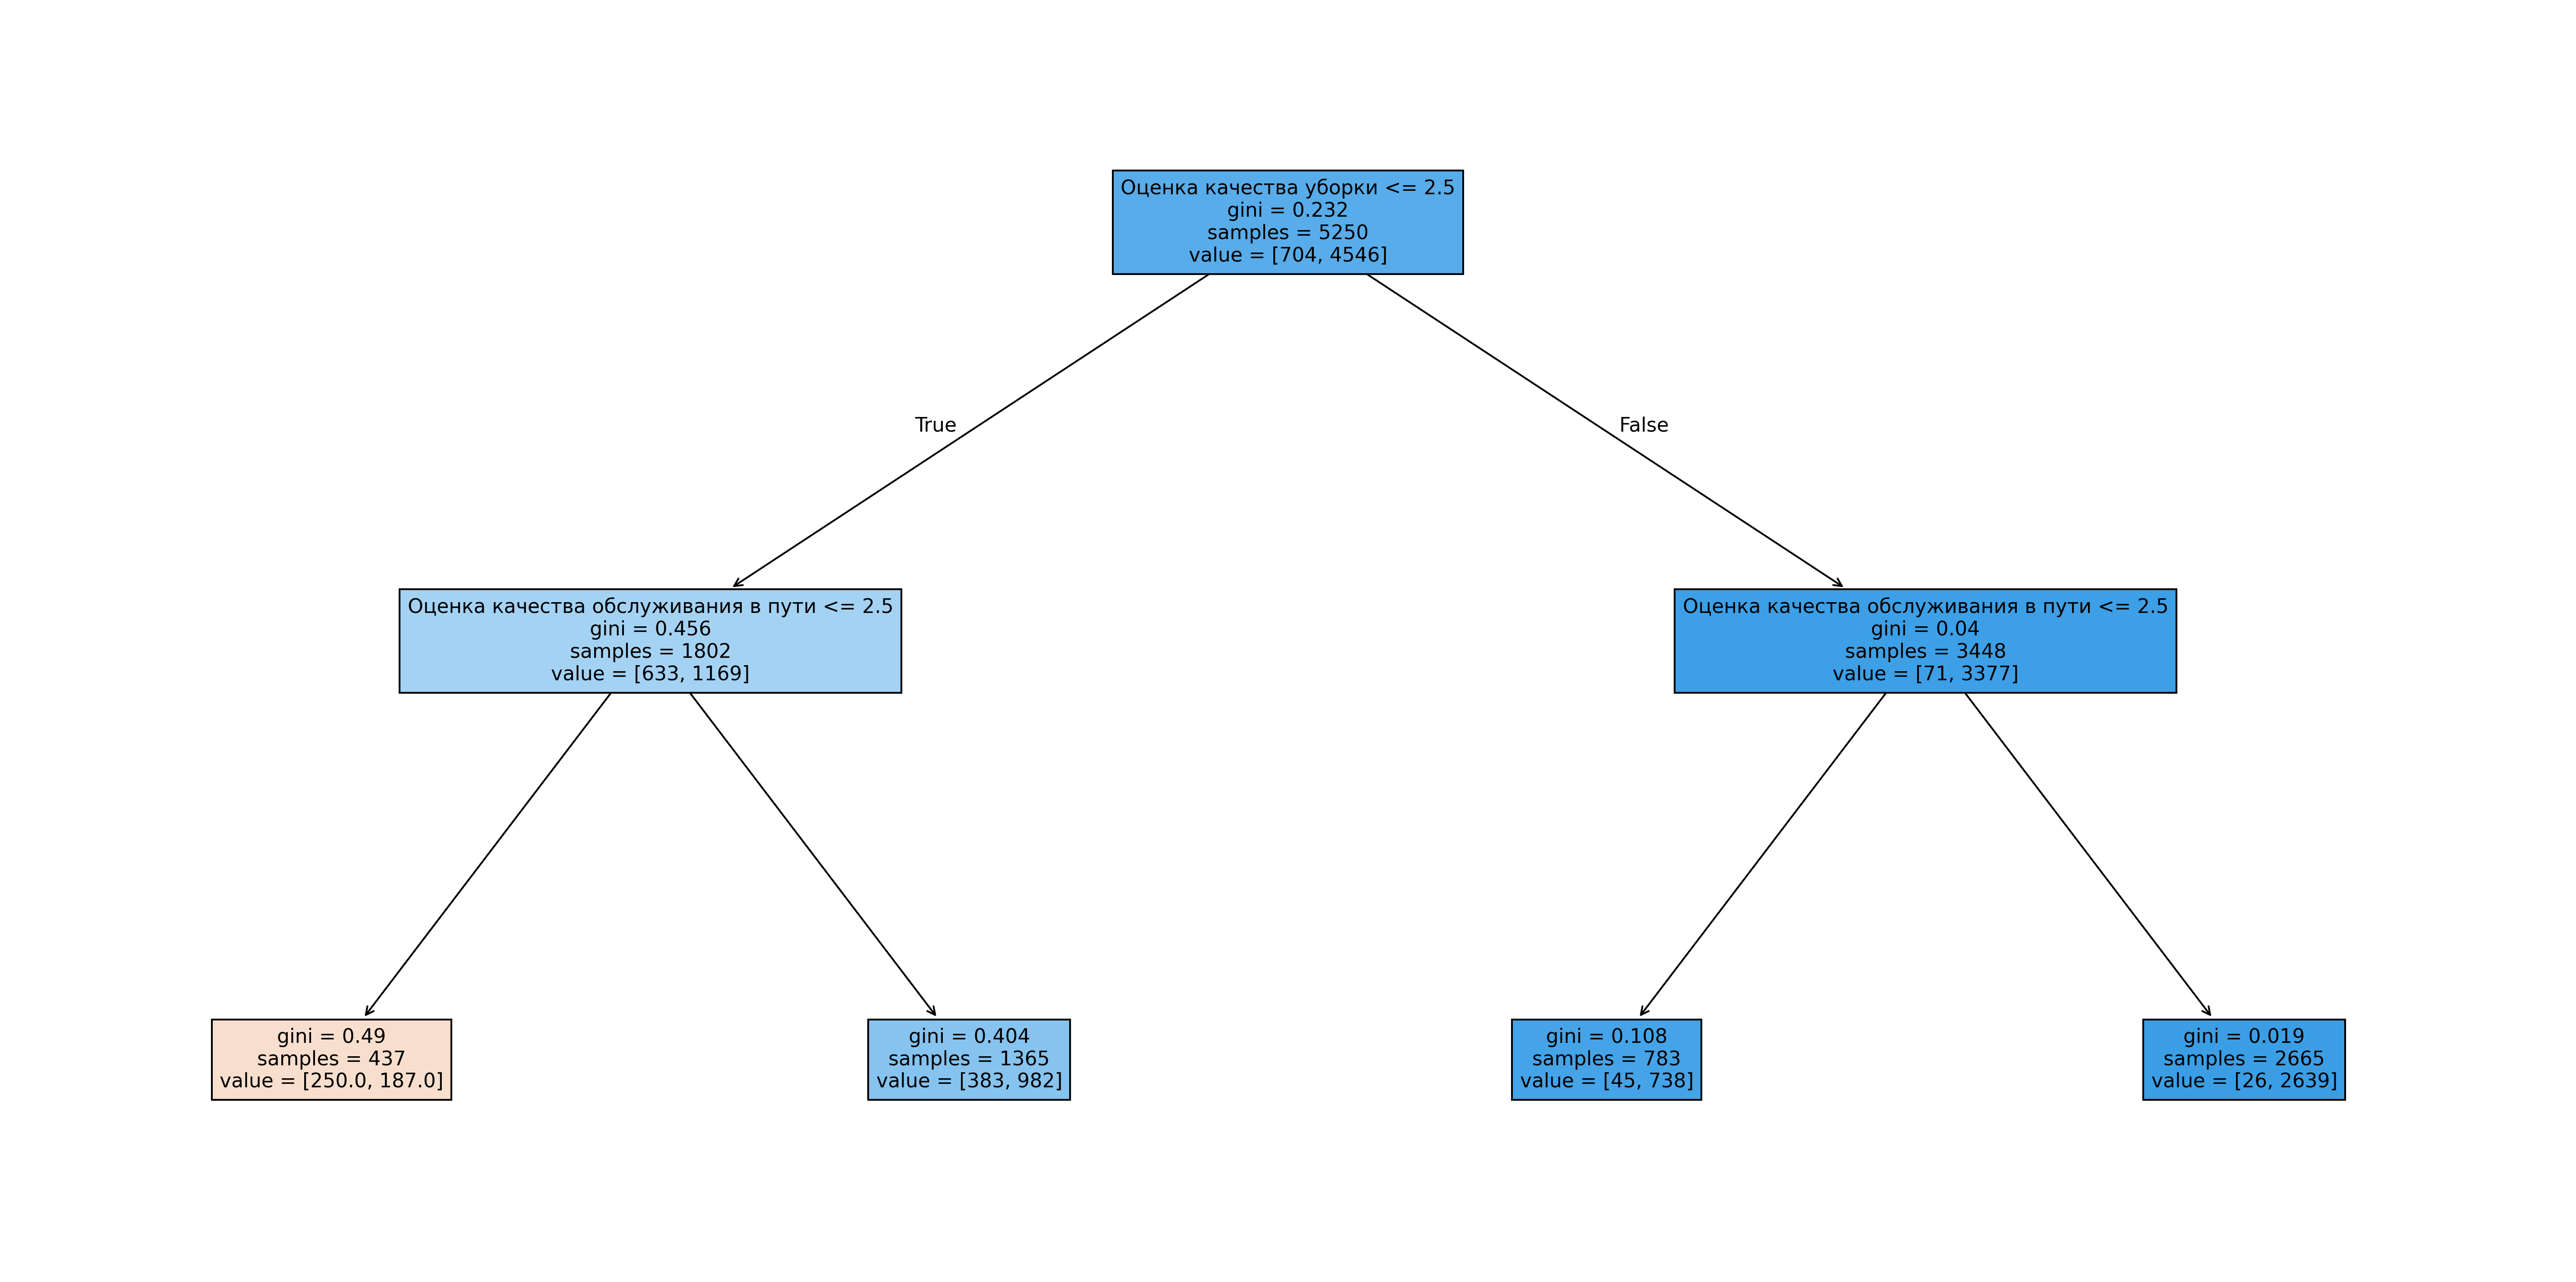

In [157]:
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(decision_tree=temp_model, feature_names=X_train.columns, filled=True)
plt.tight_layout()

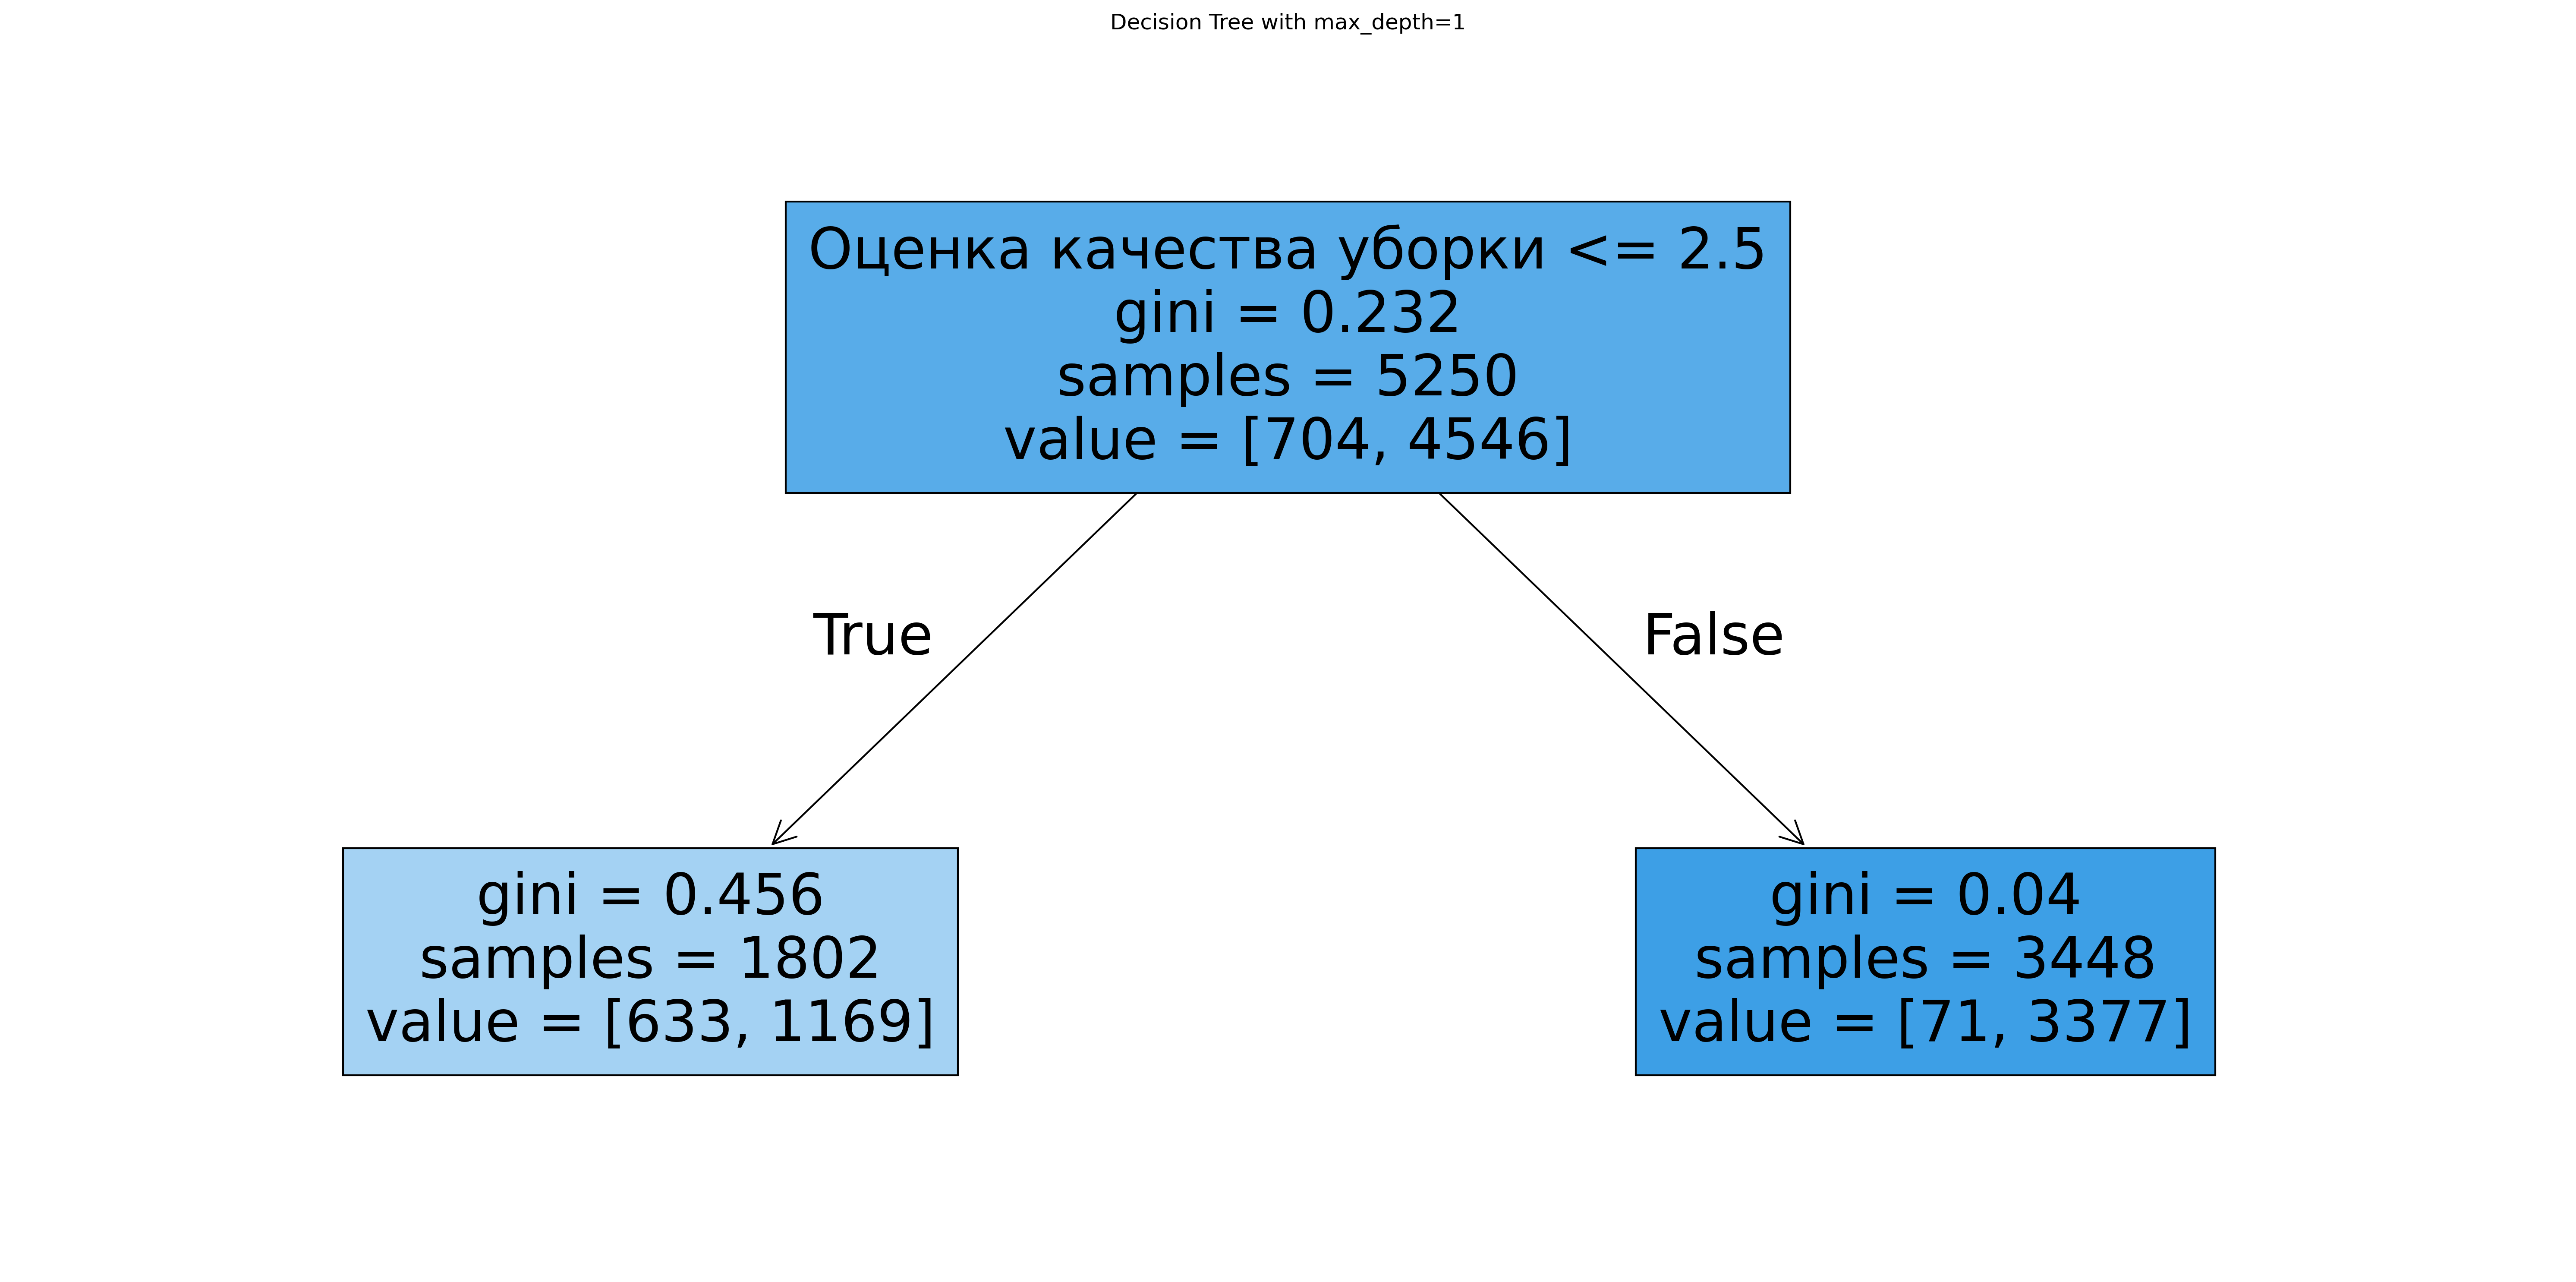

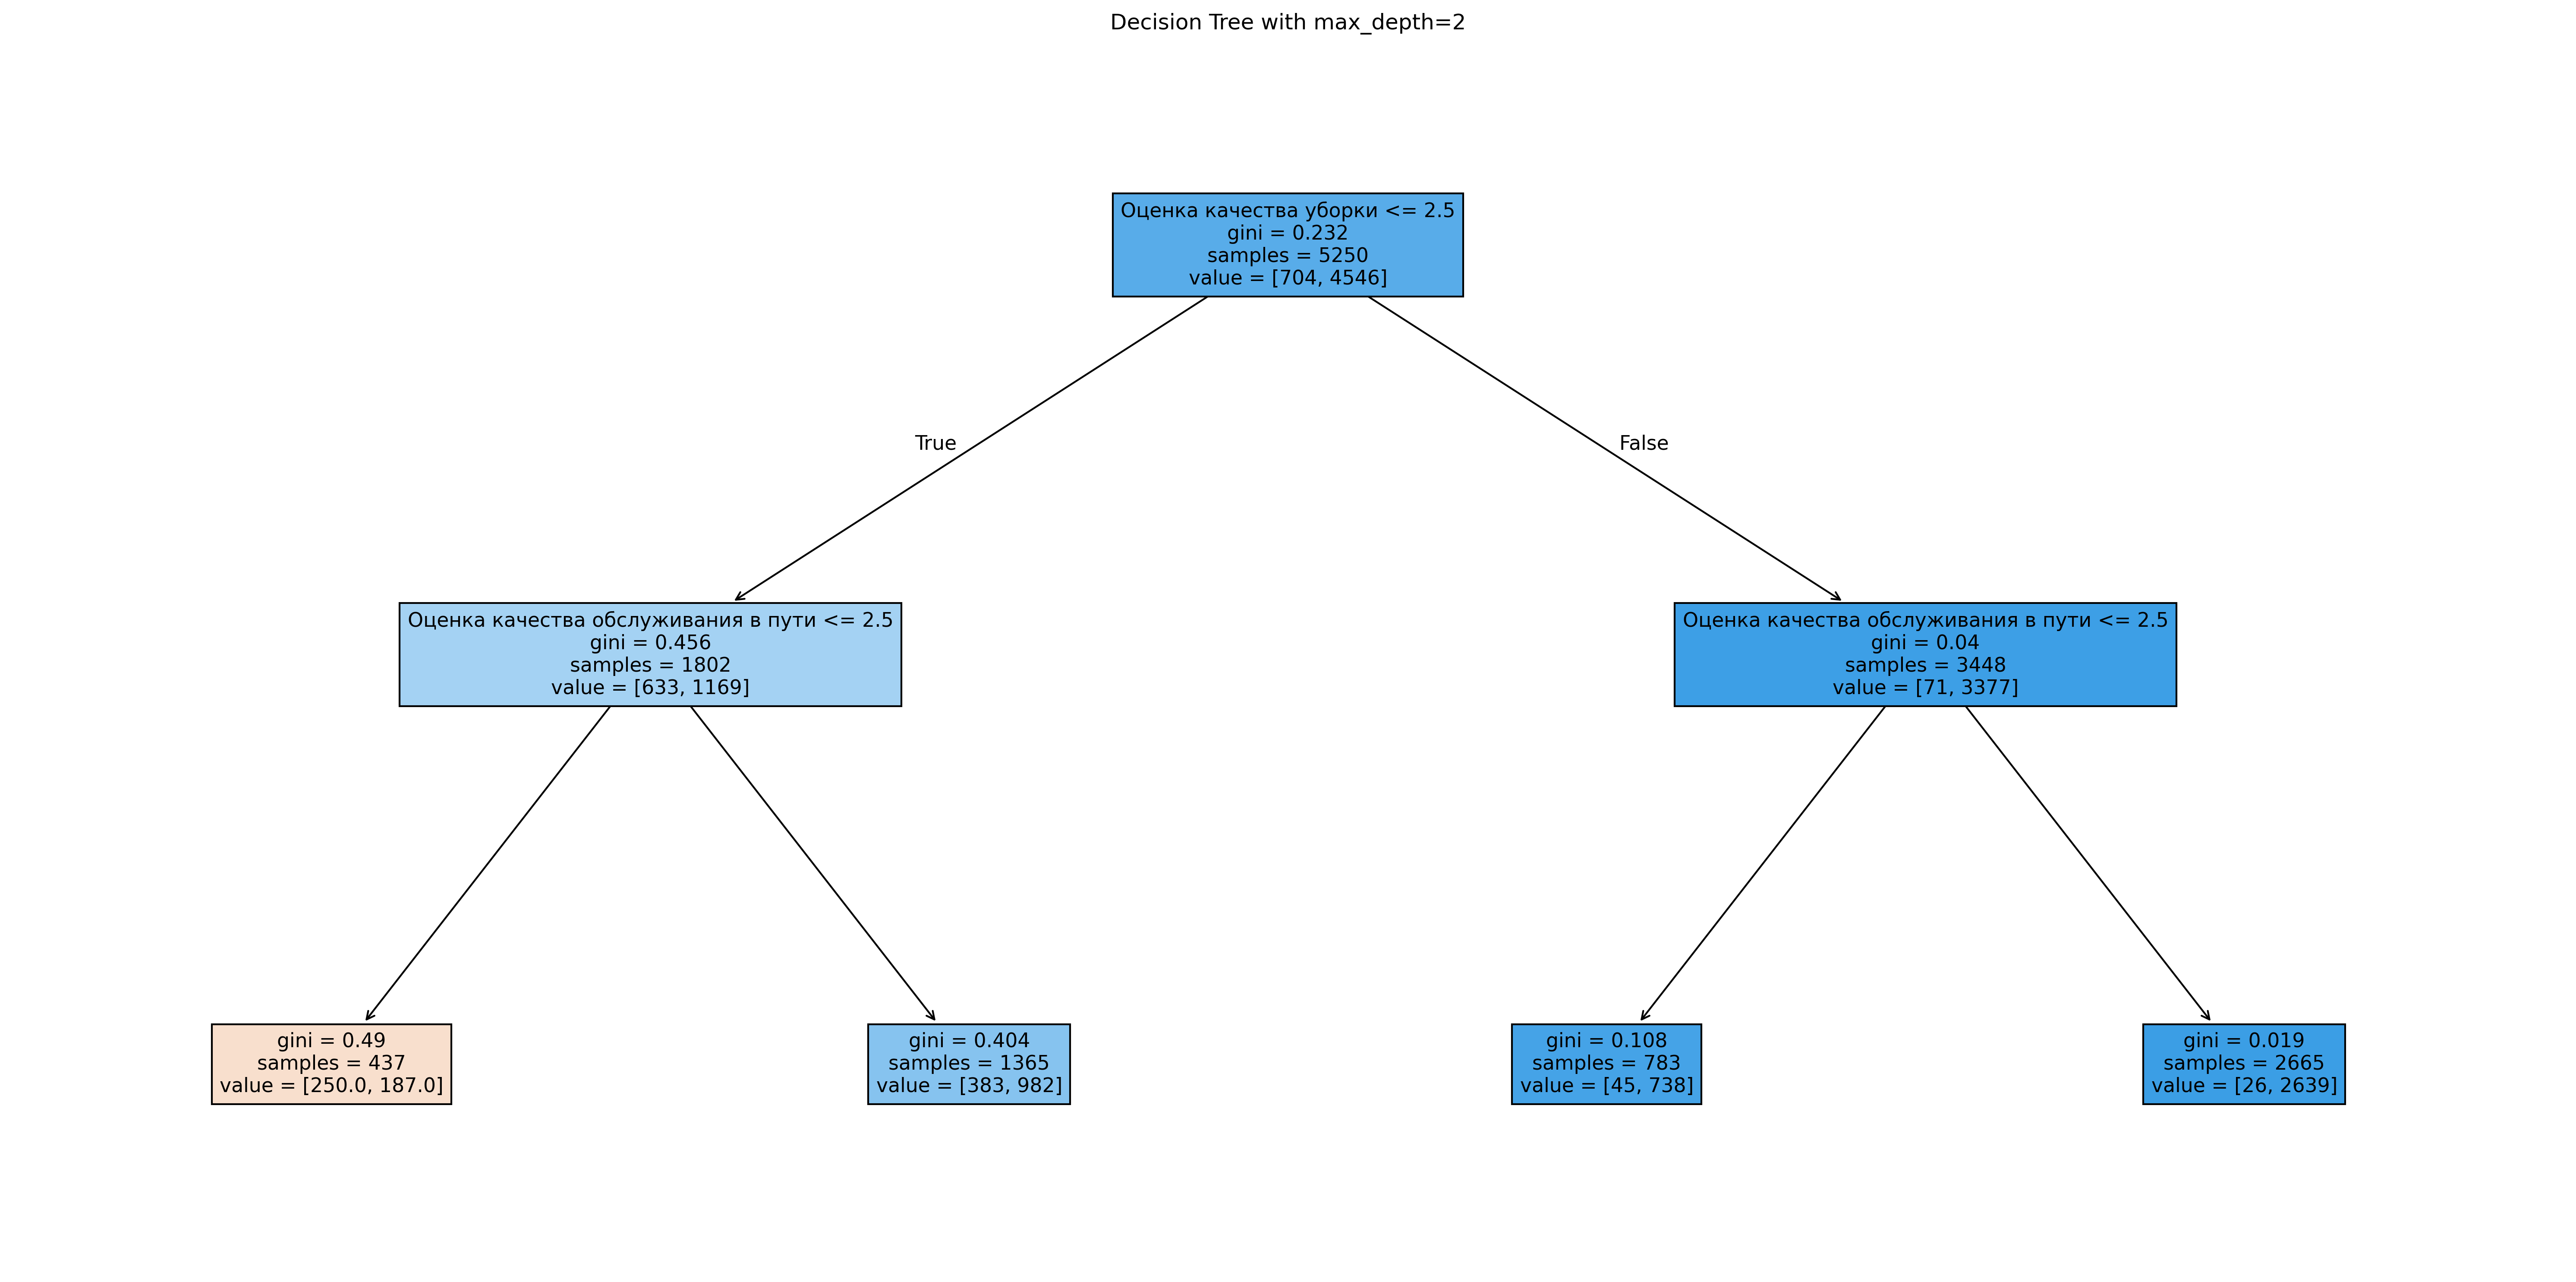

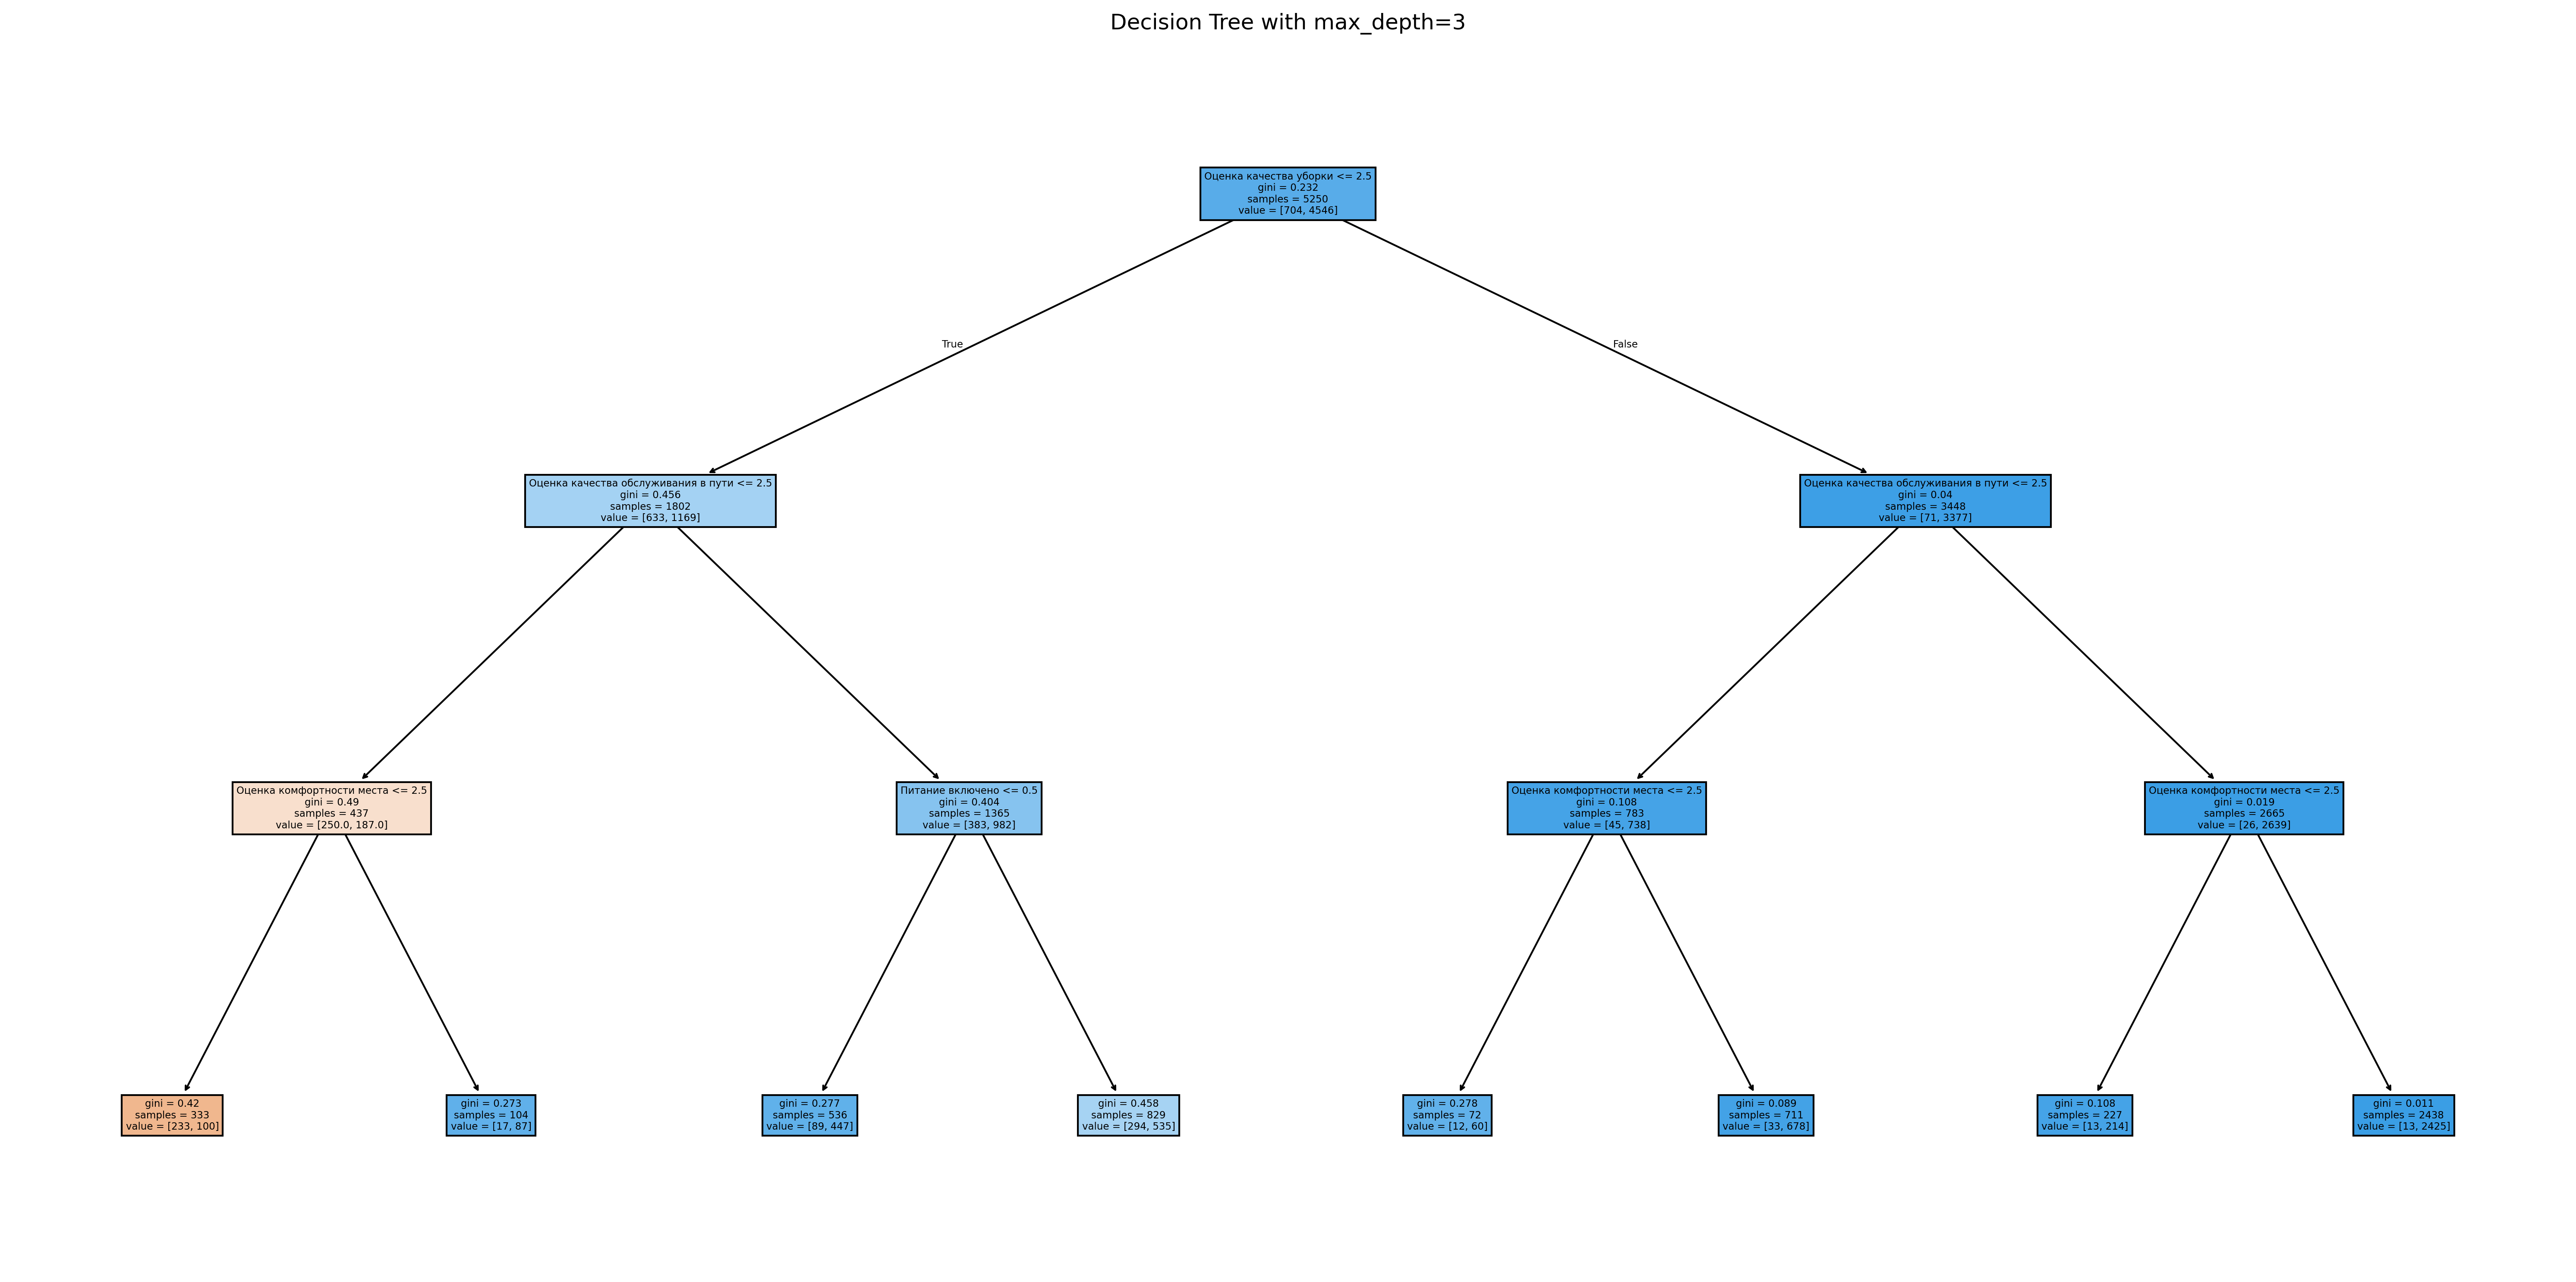

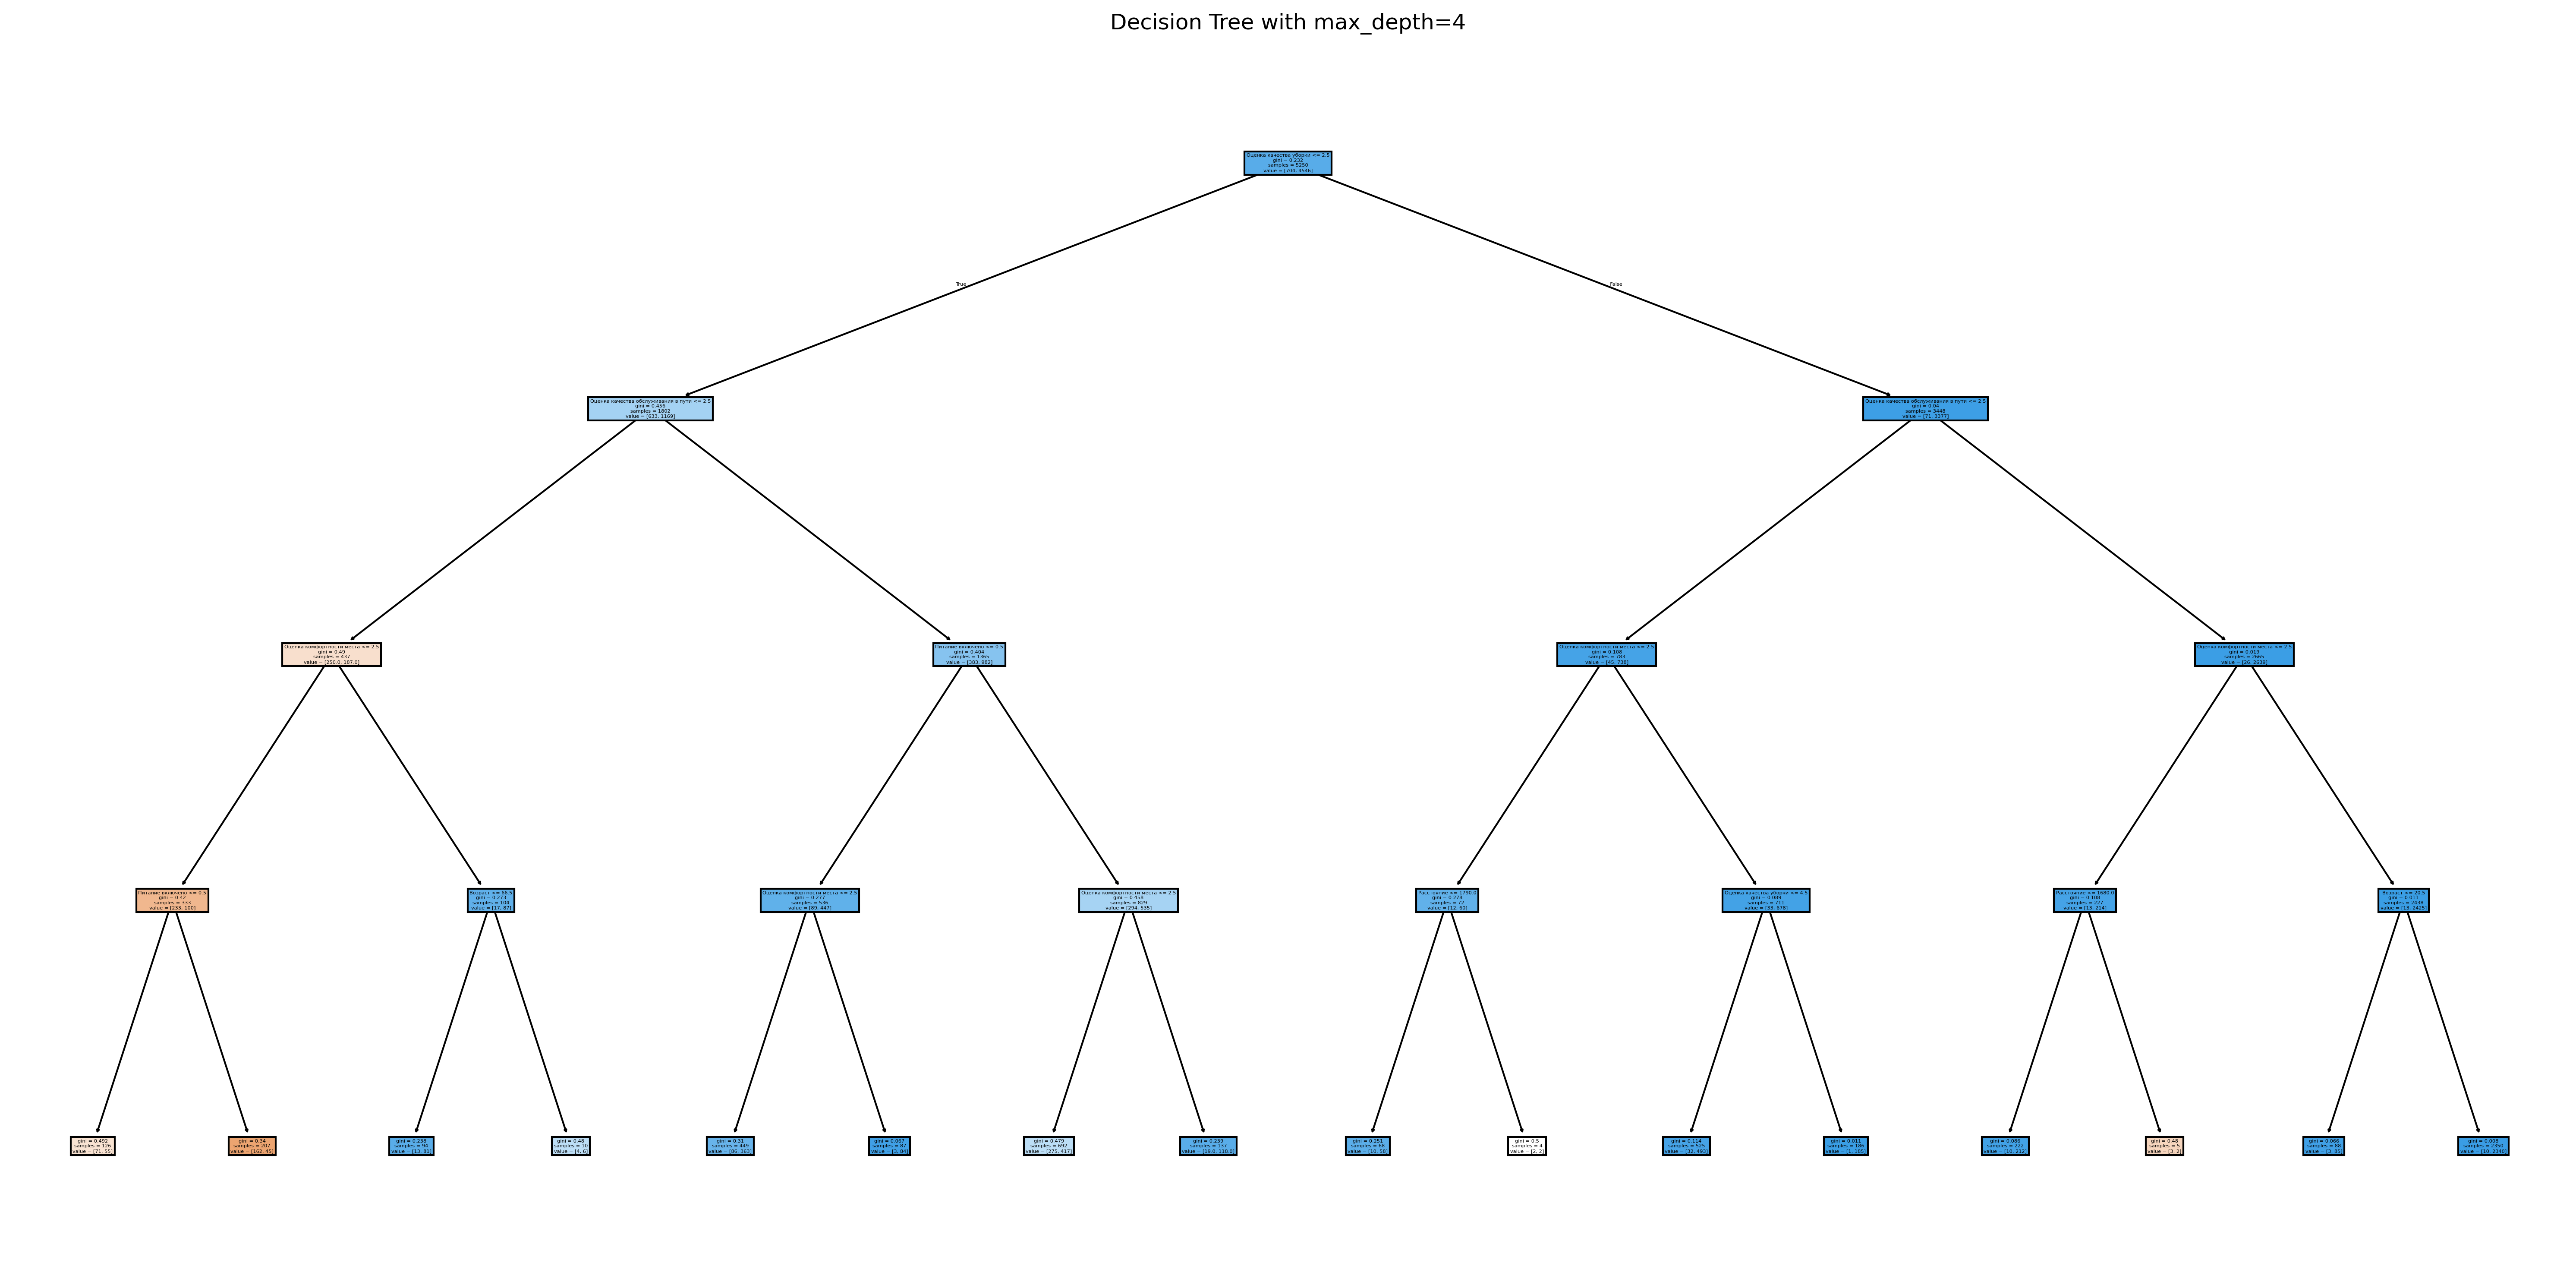

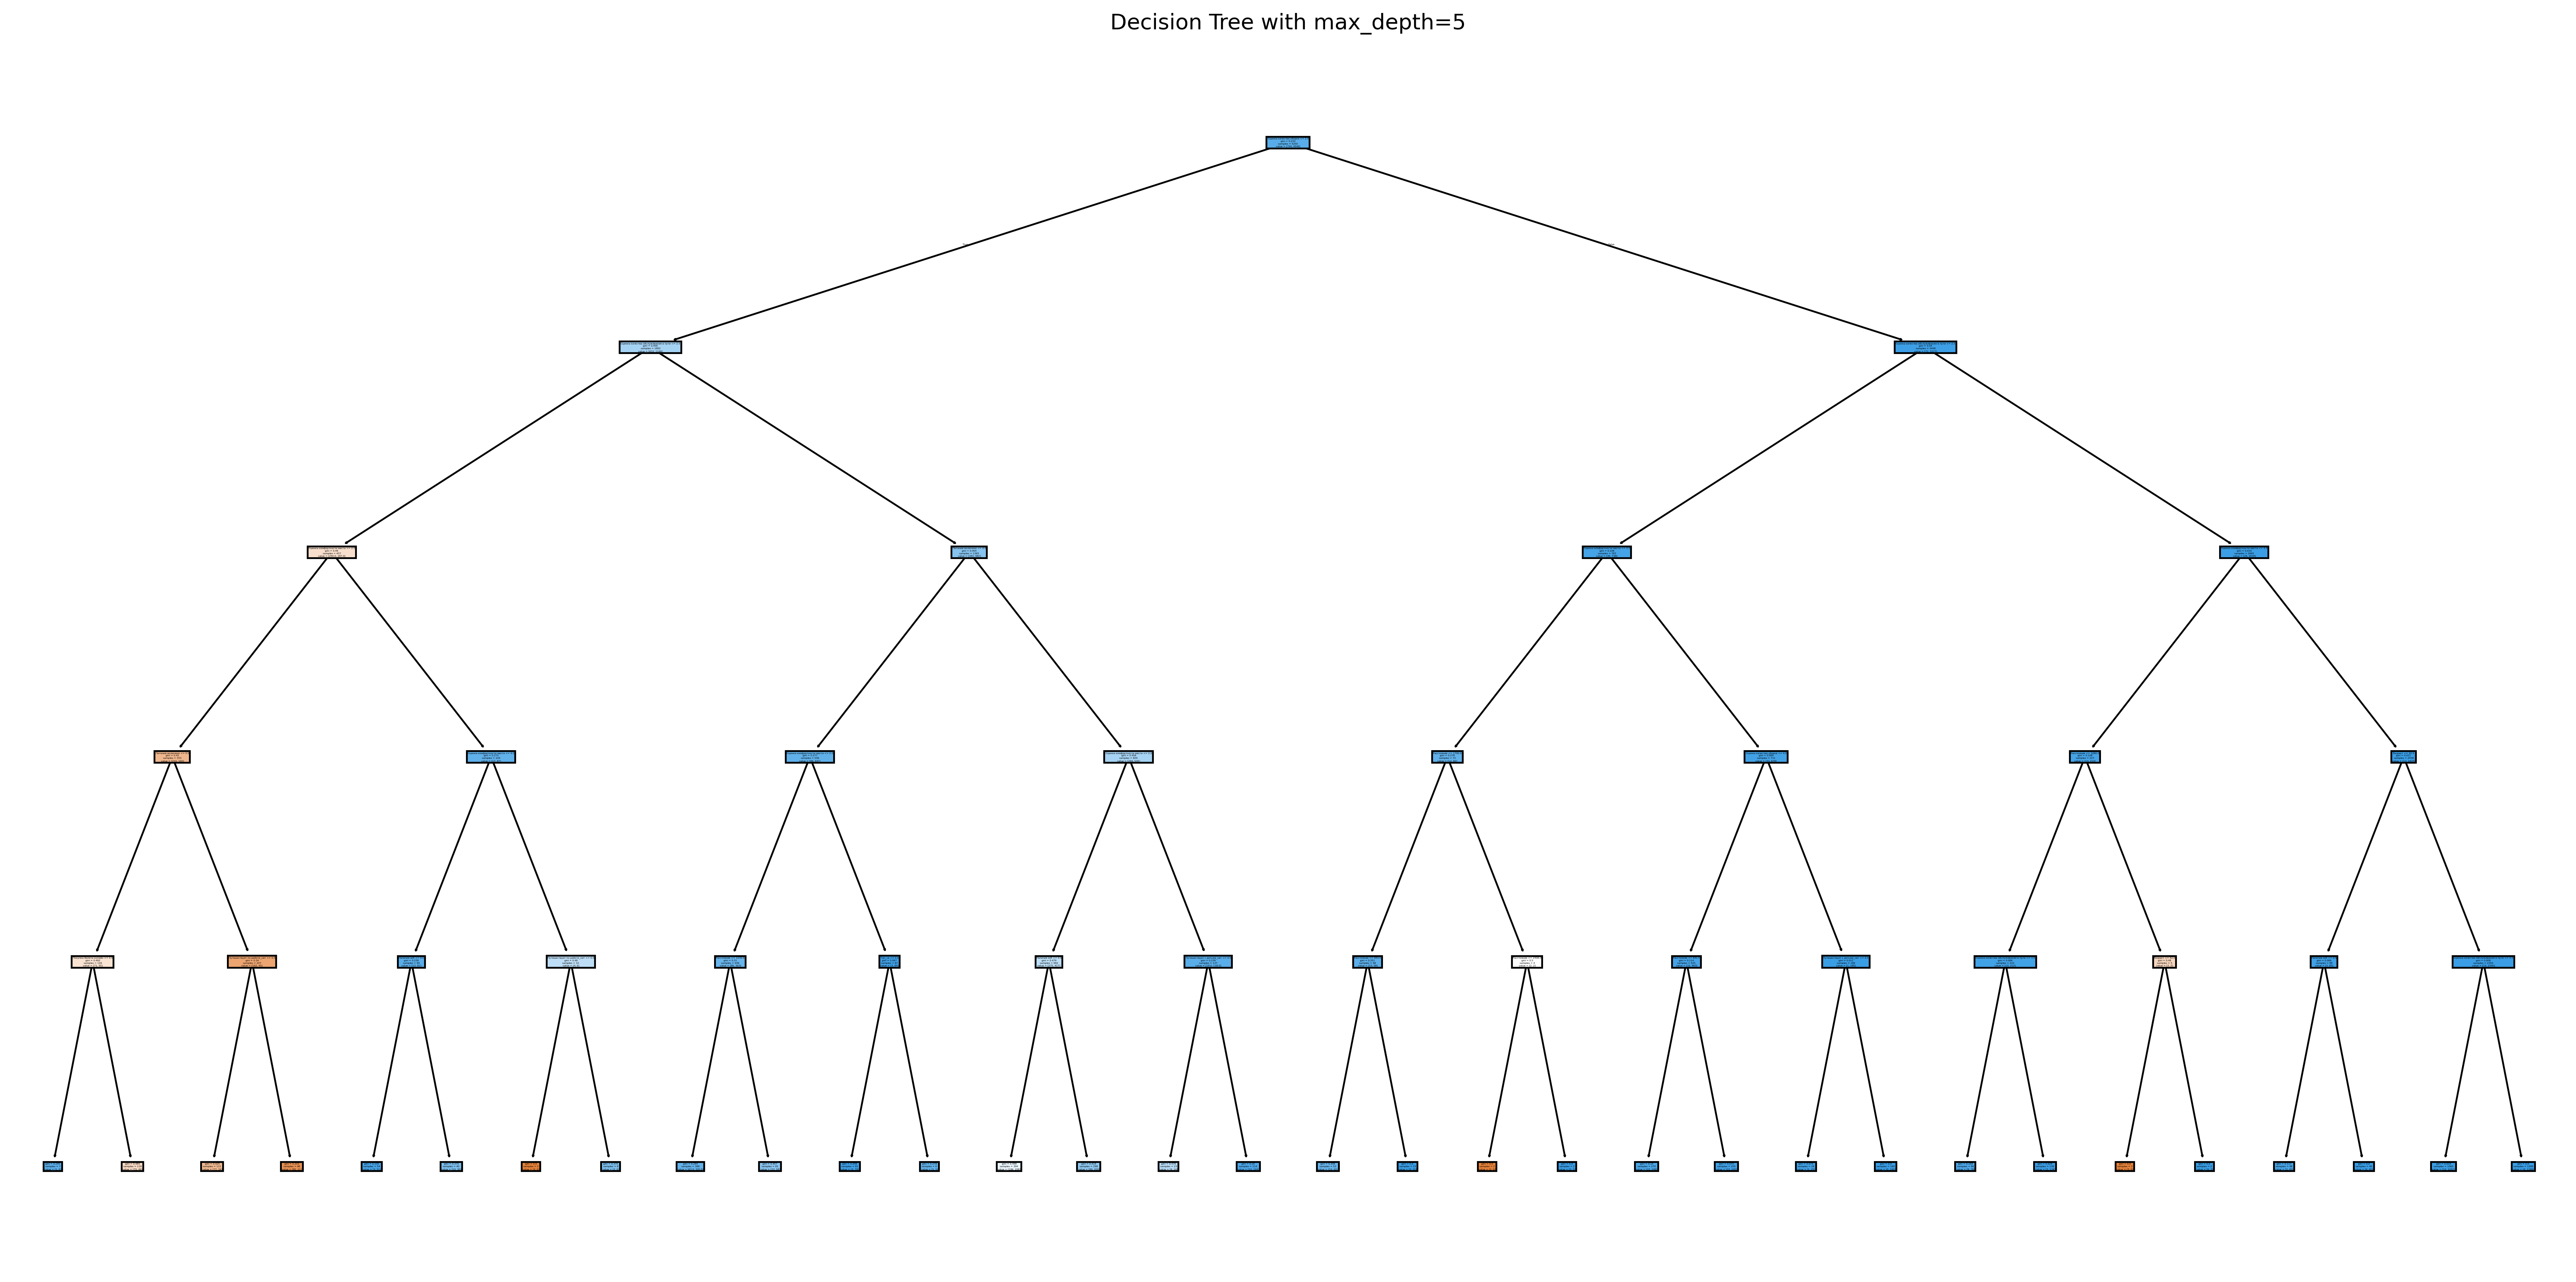

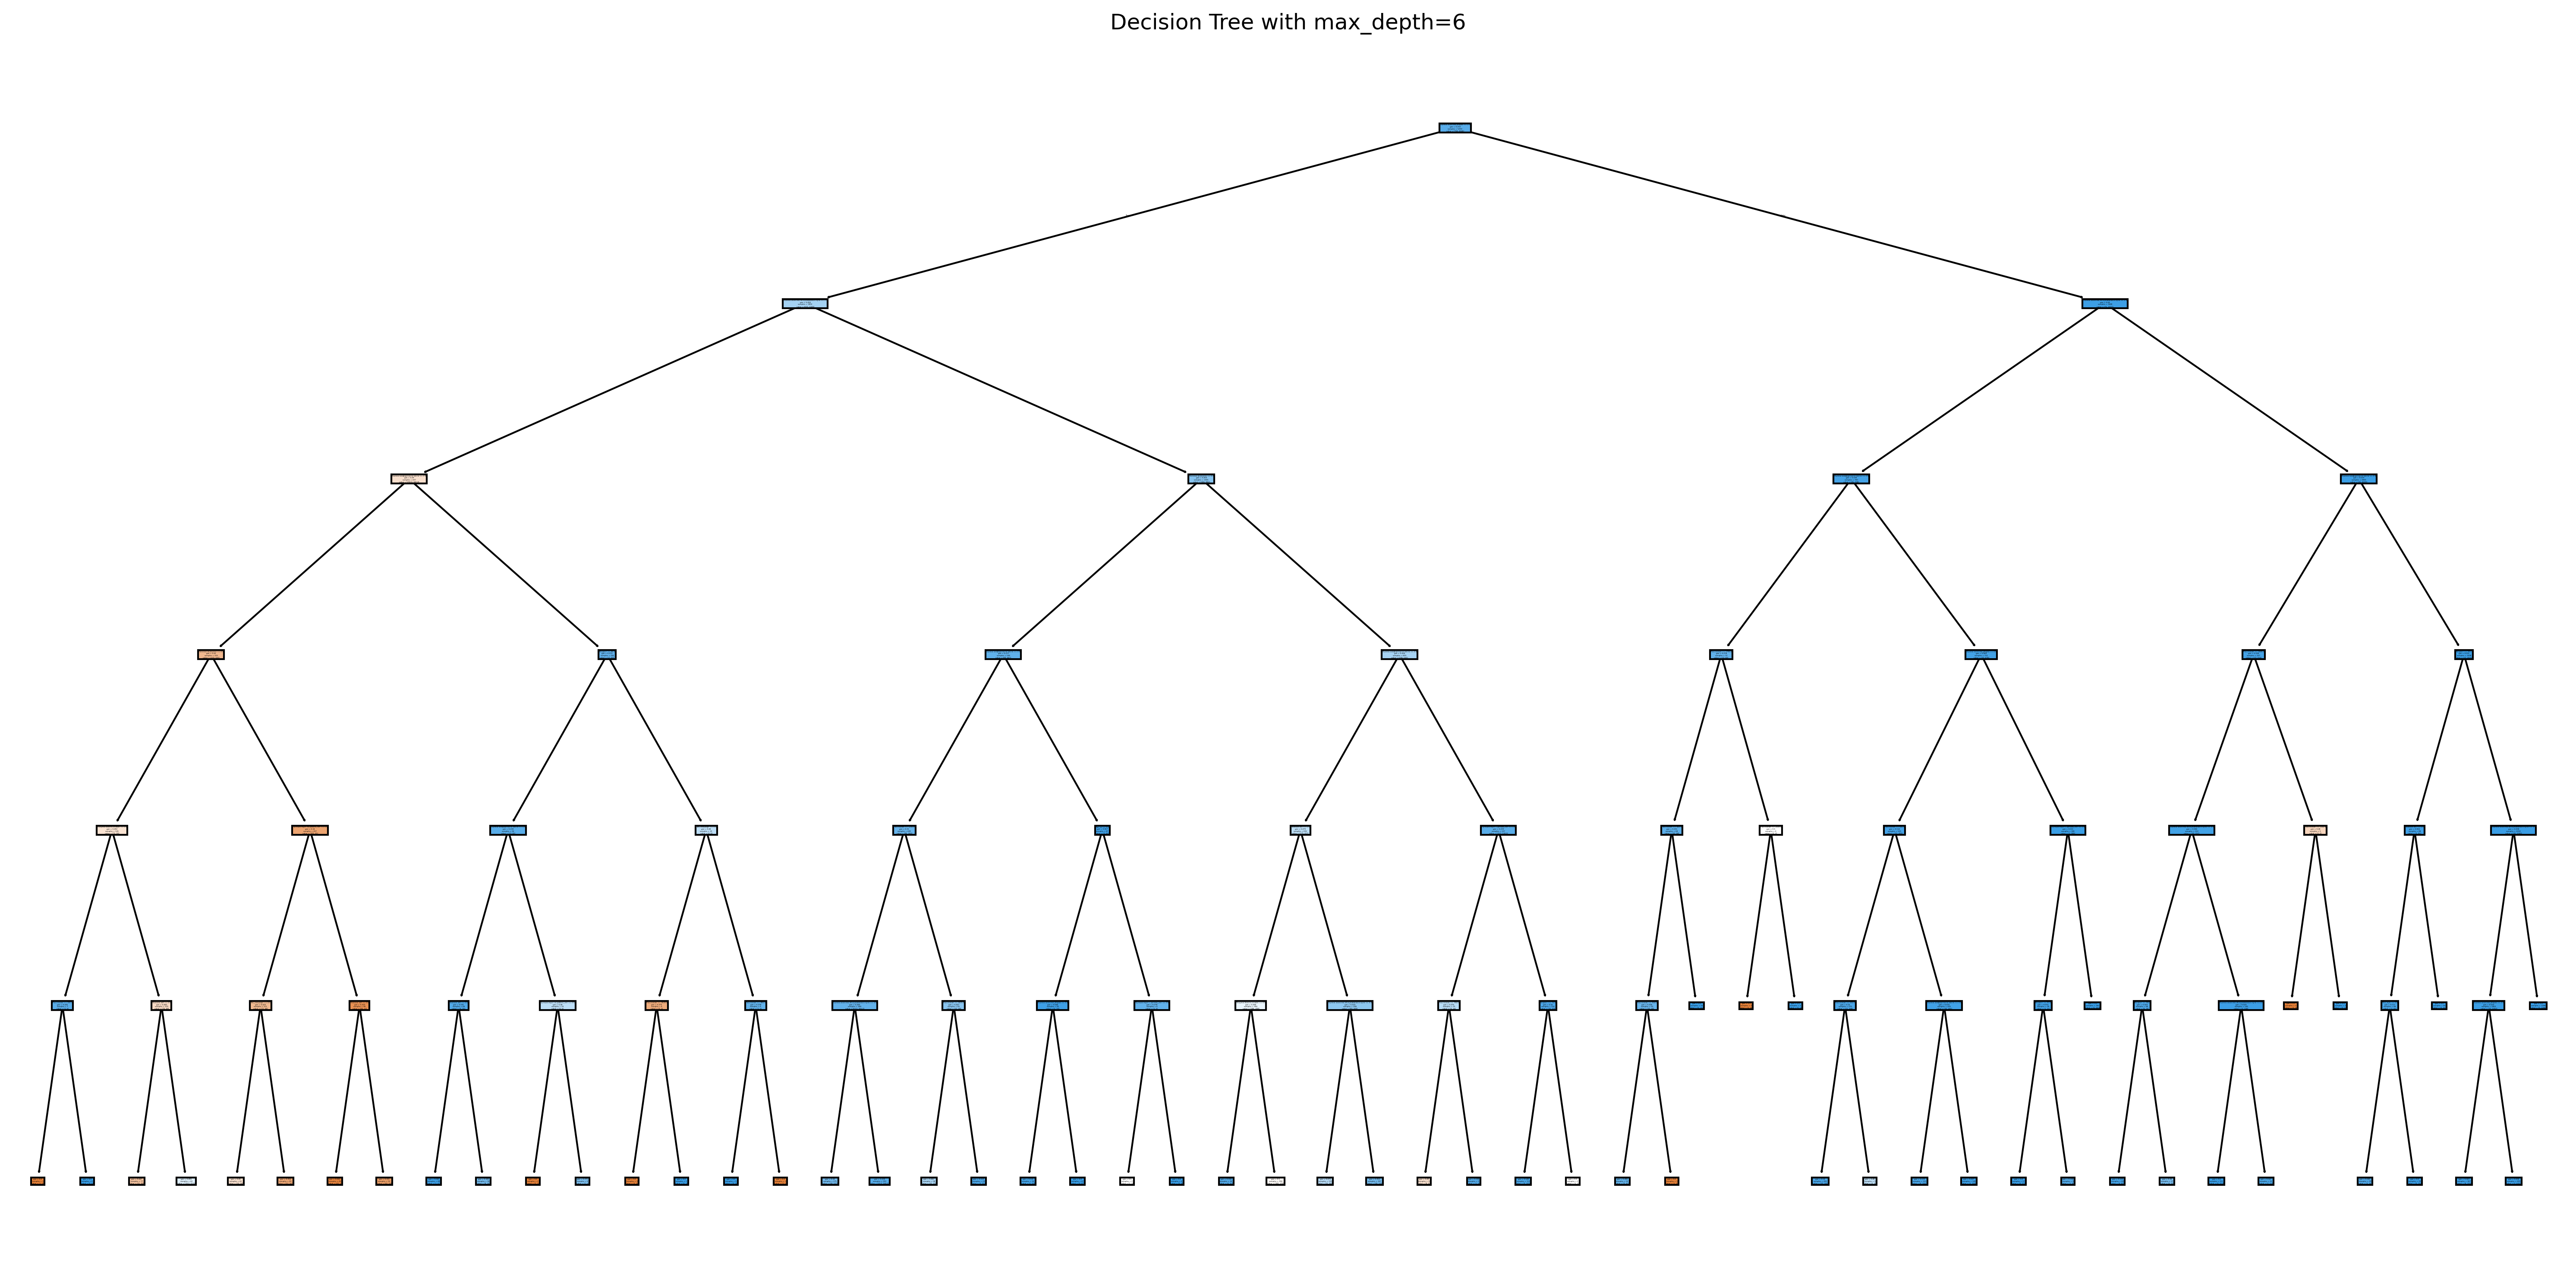

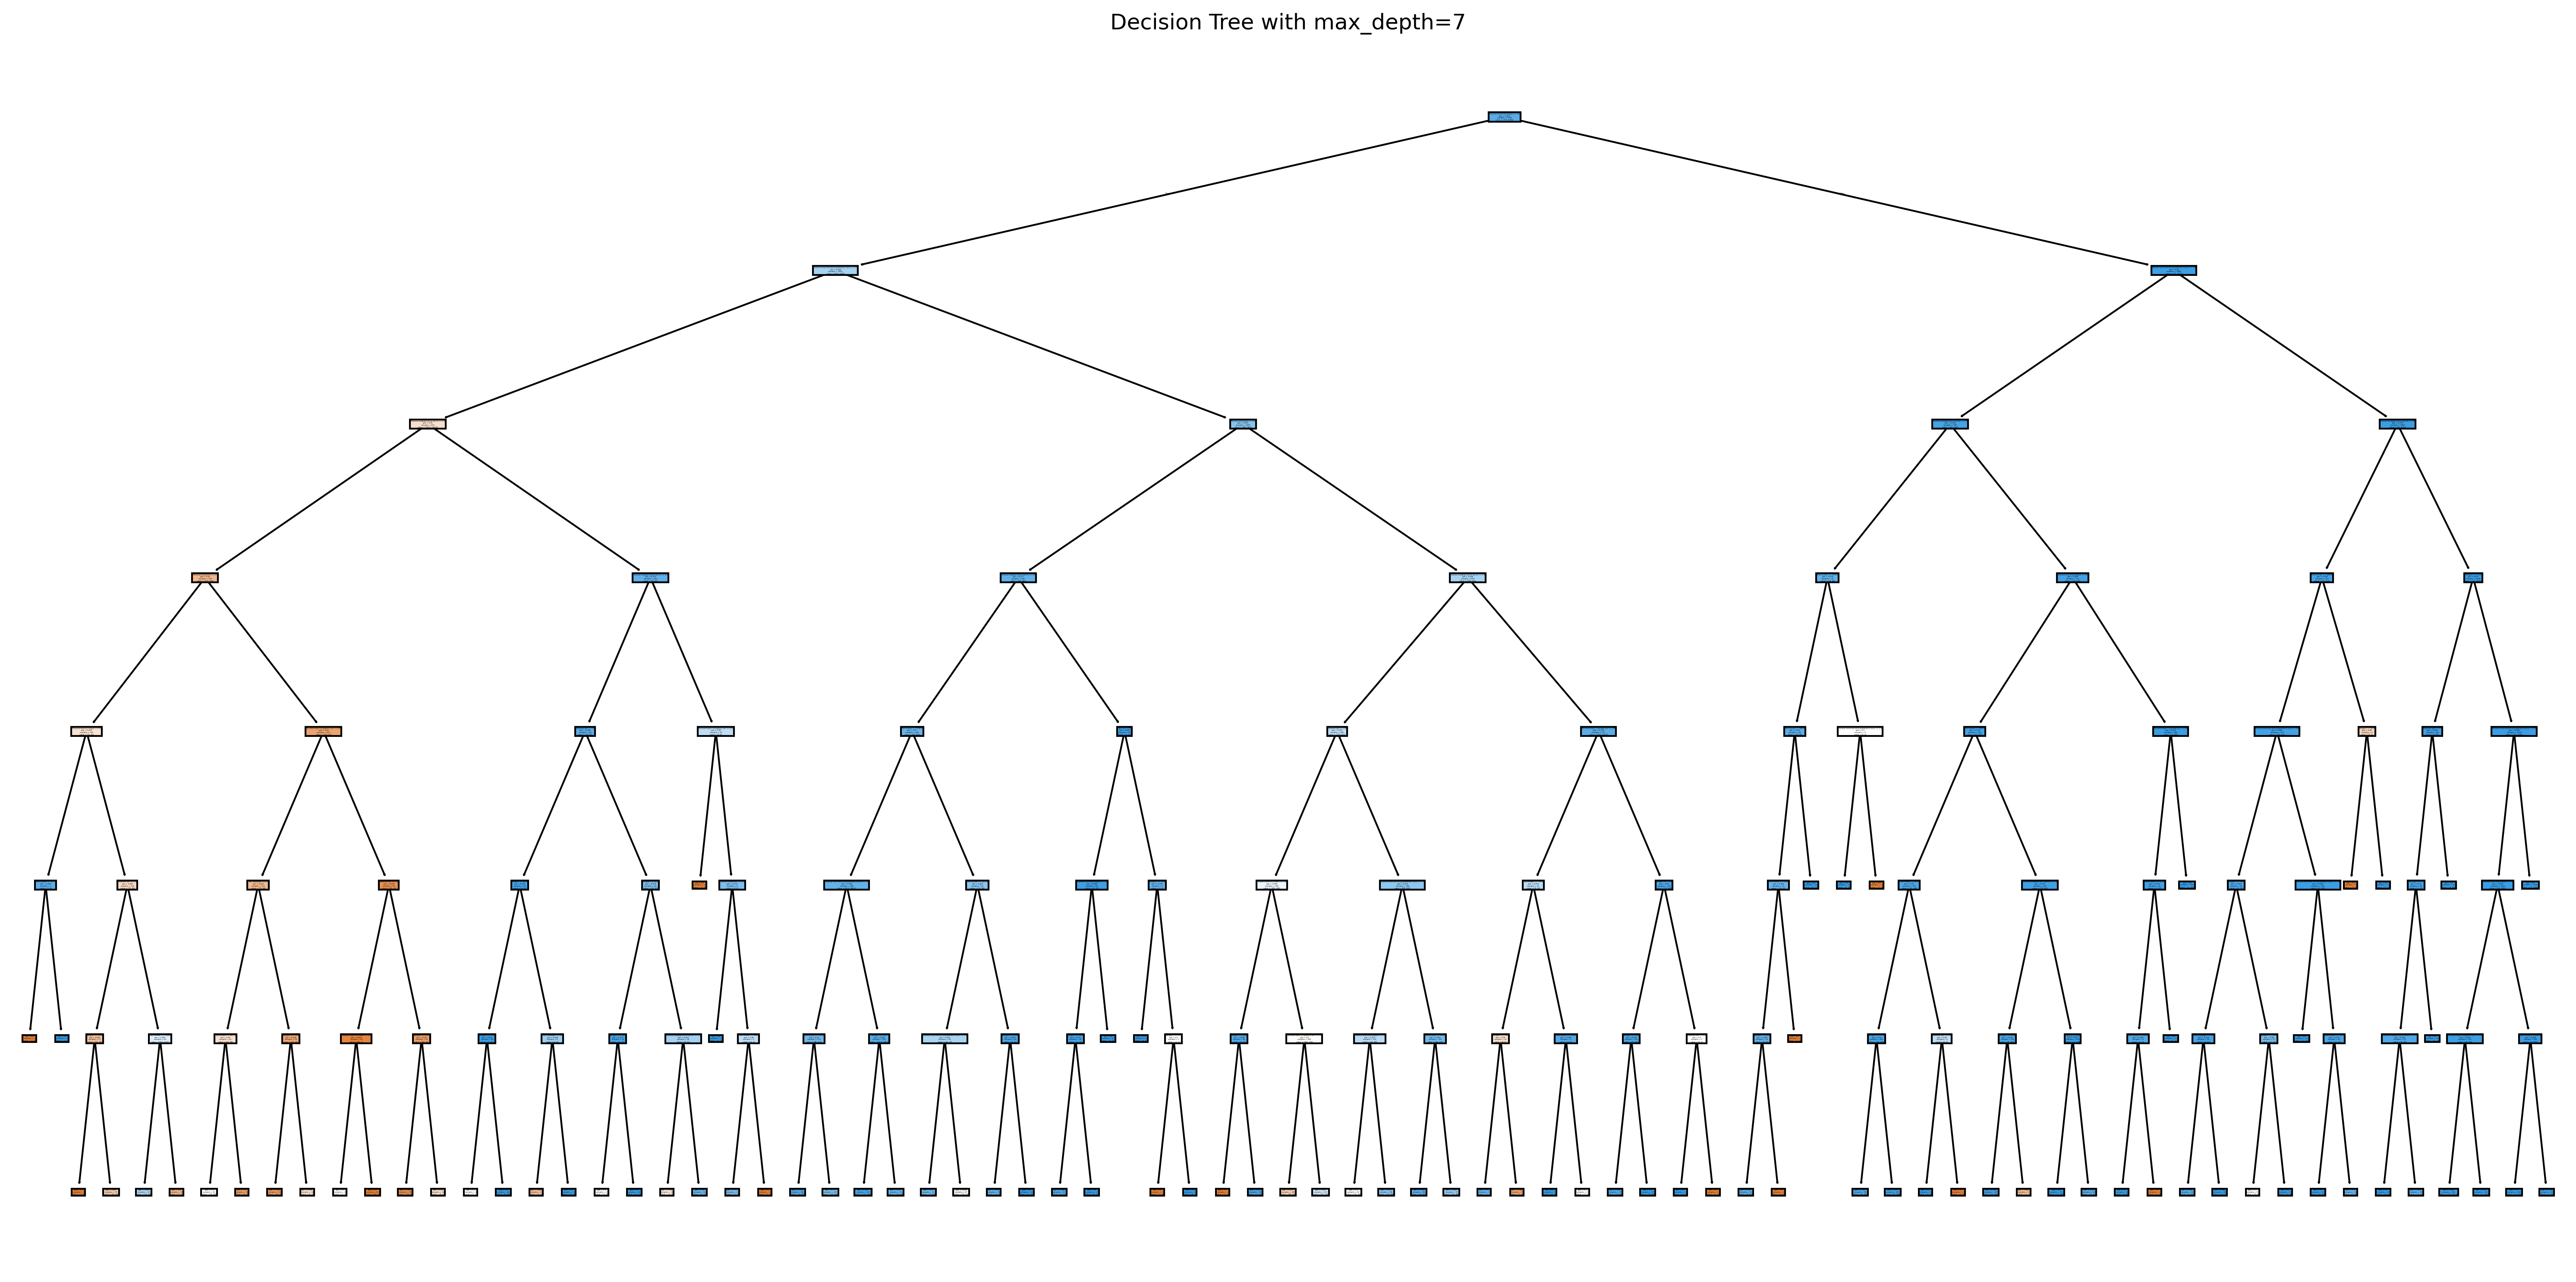

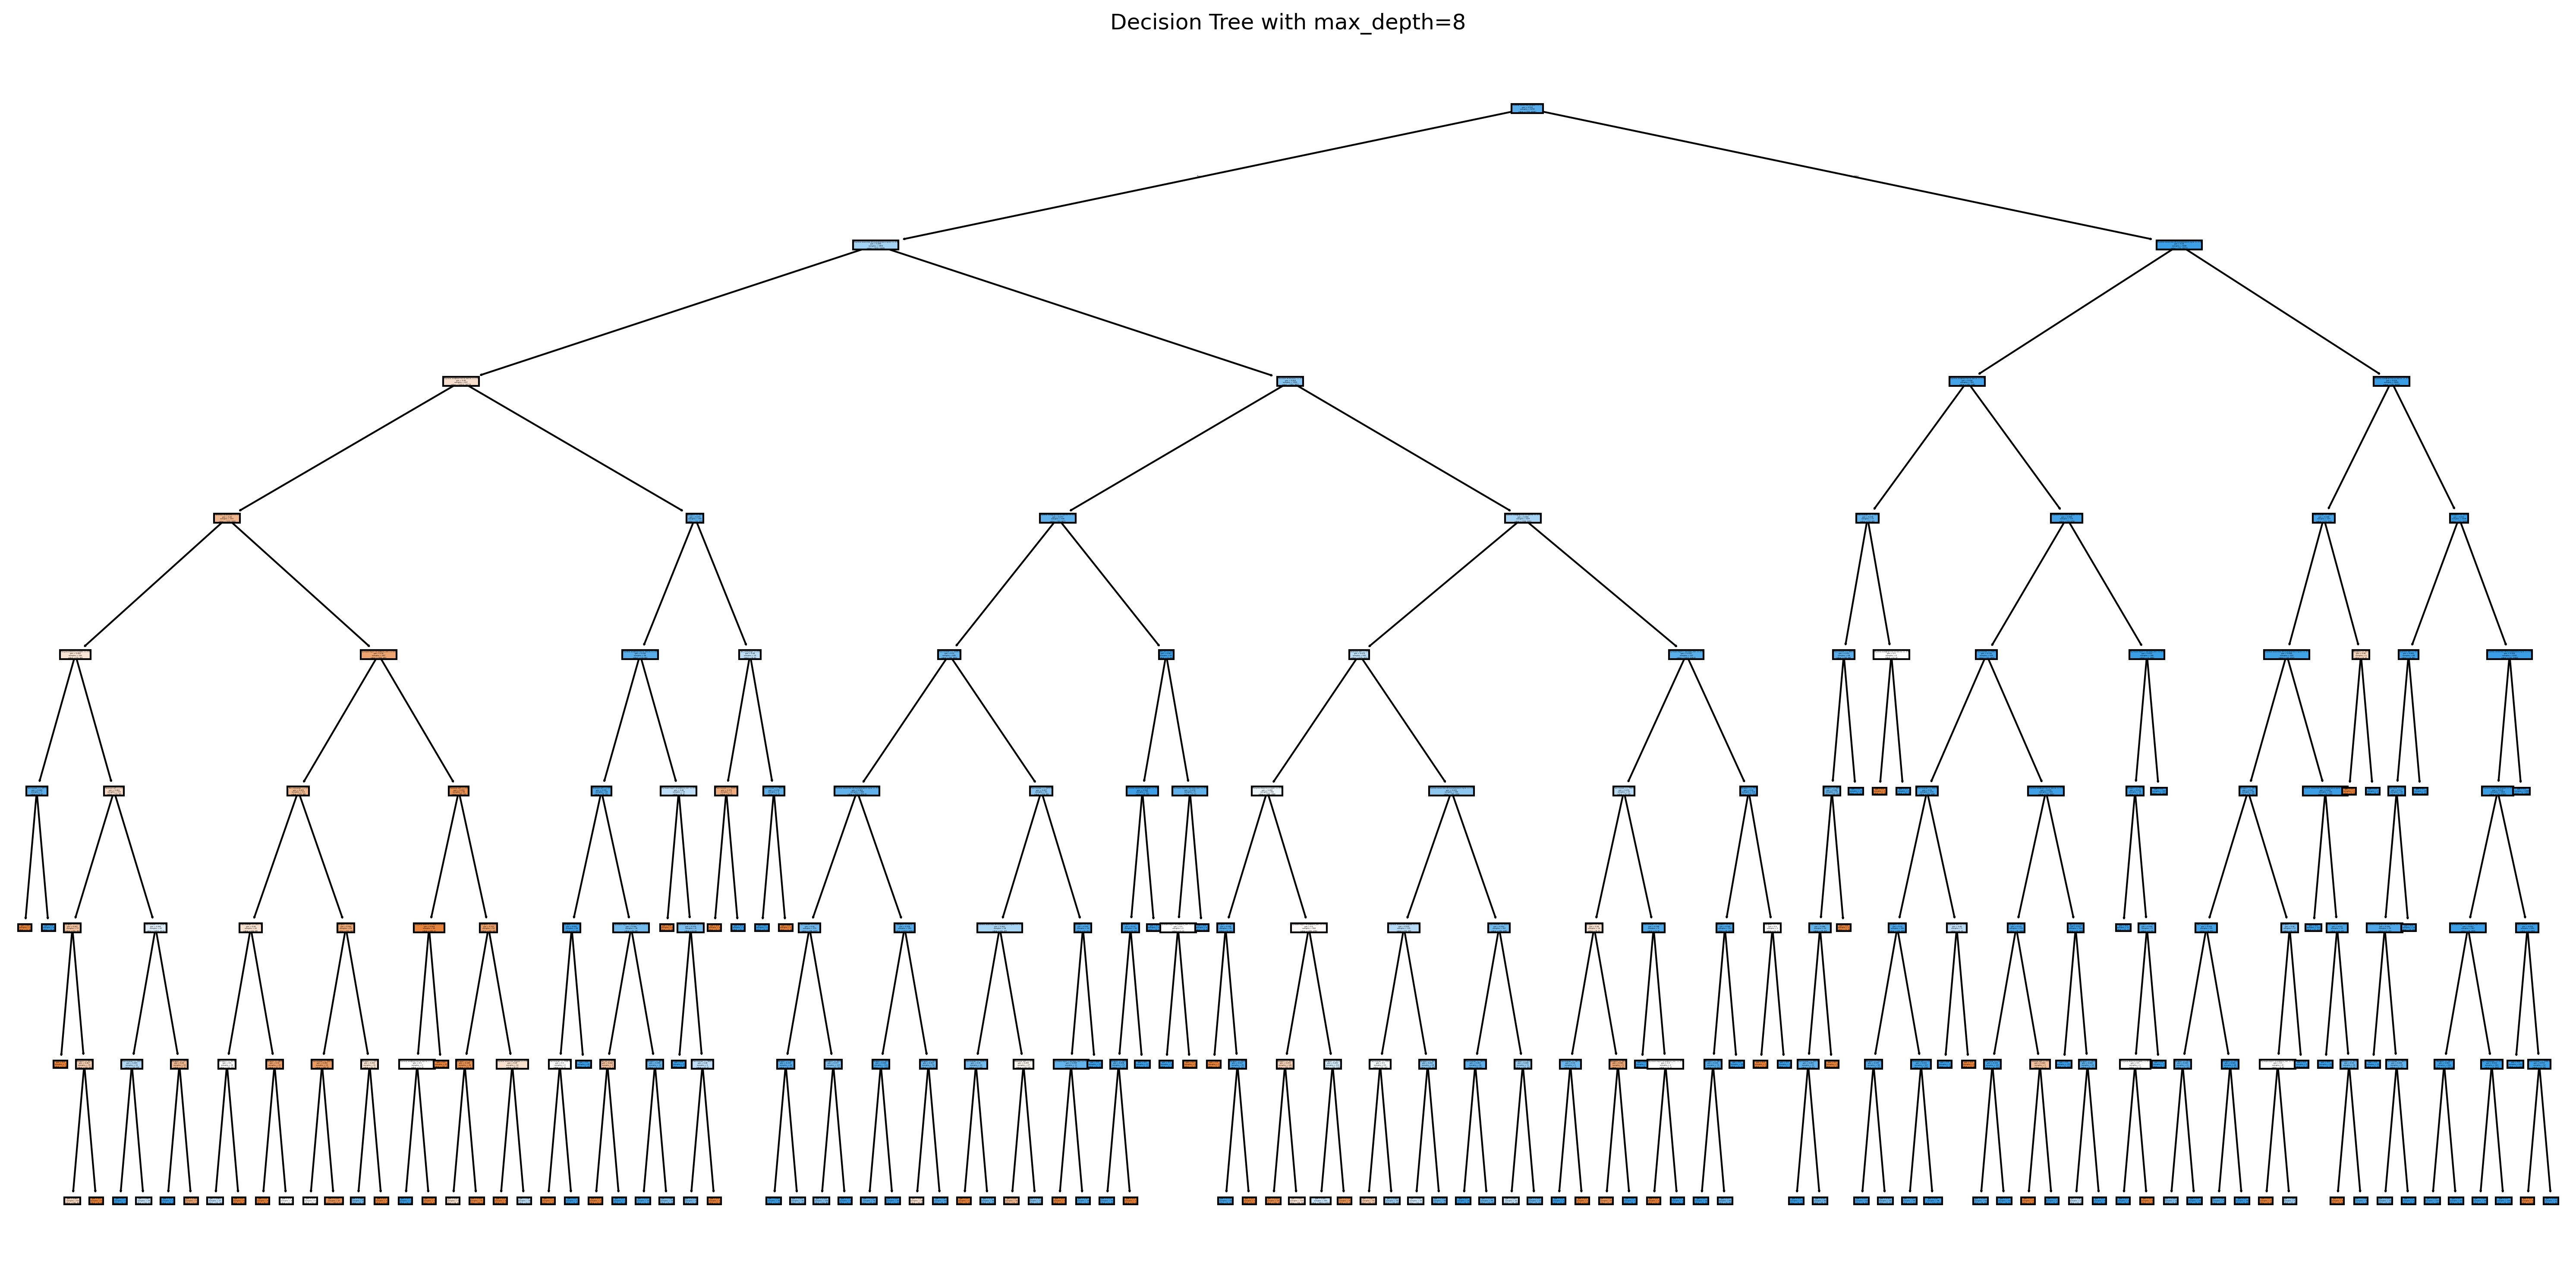

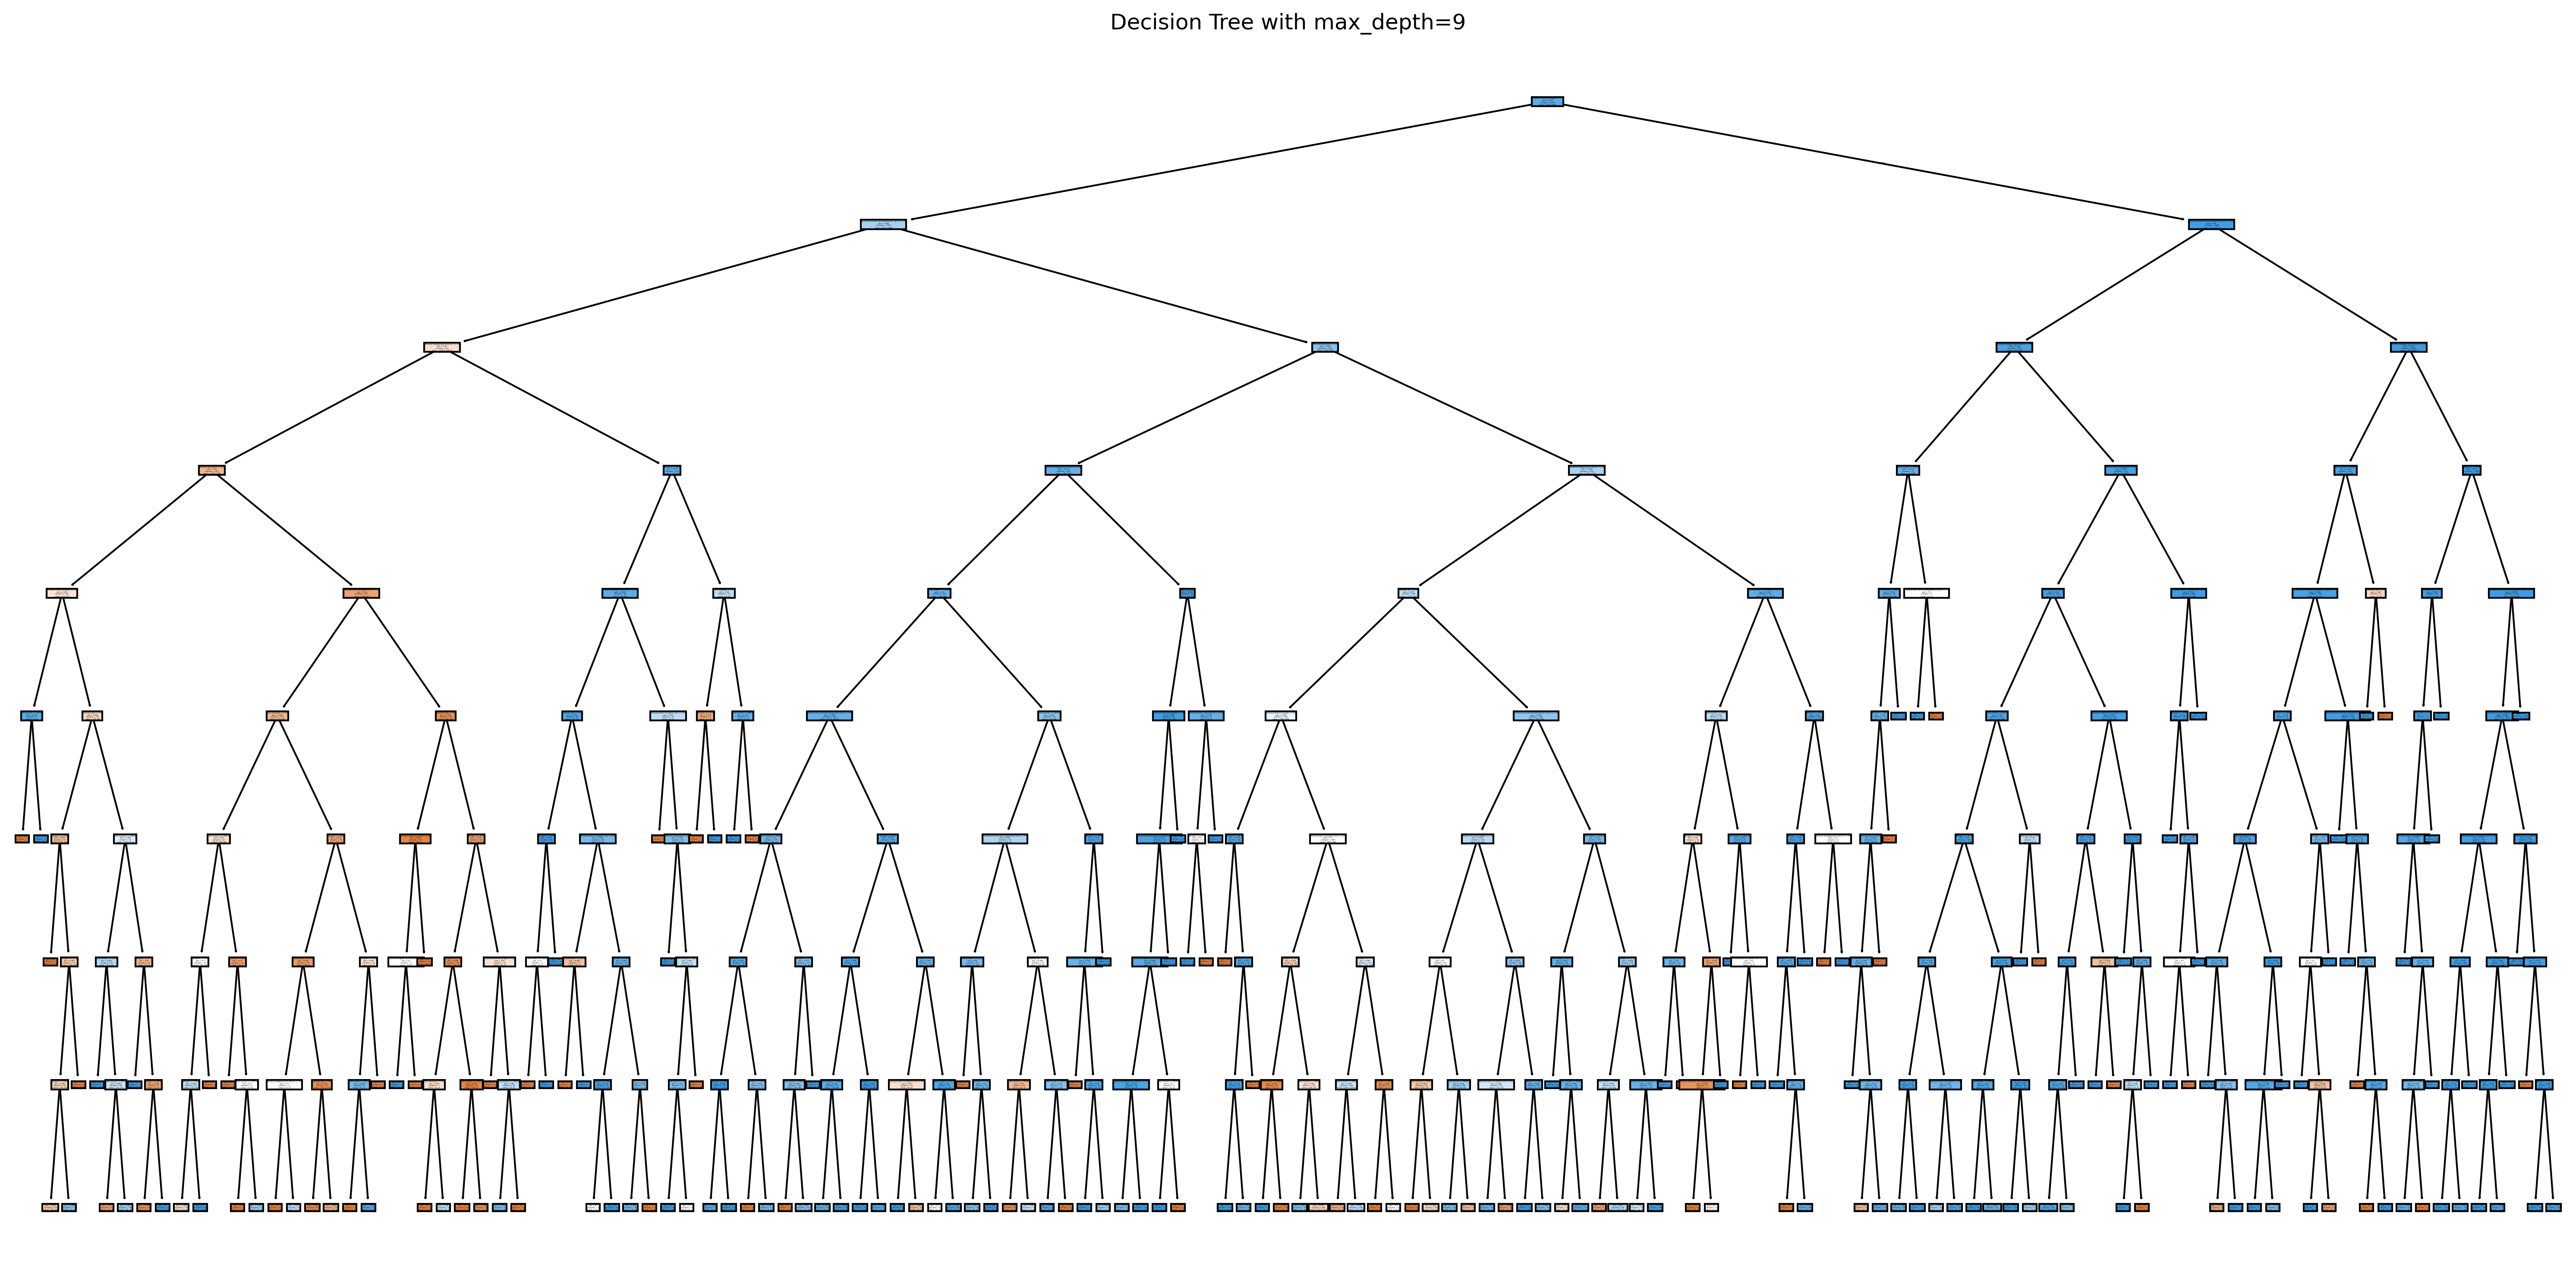

In [158]:
for level in range(1, 10):
    temp_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=level)
    temp_model.fit(X_train, y_train)
    
    plt.figure(figsize=(20, 10), dpi=300)
    plot_tree(decision_tree=temp_model, feature_names=X_train.columns, filled=True)
    plt.title(f"Decision Tree with max_depth={level}")
    plt.tight_layout()
    plt.show()

<Axes: >

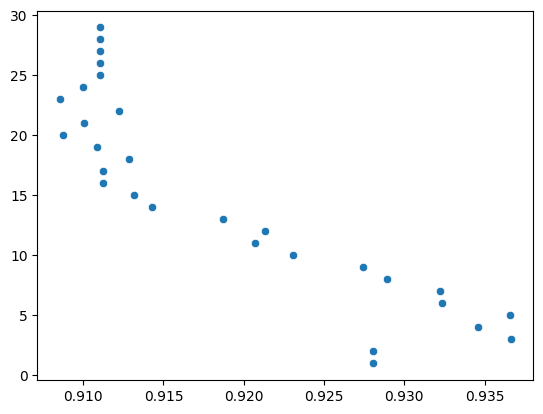

In [168]:
temp_metrics = []
for level in range(1, 30):
    temp_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=level)
    temp_model.fit(X_train, y_train)
    
    y_pred = temp_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    temp_metrics.append(f1)

sns.scatterplot(x=temp_metrics, y=range(1, 30))

In [171]:
temp_metrics = []
temp_count = 1
for min_samples_split in range(2, 5):
    for min_samples_leaf in range(1, 5):
            for max_depth in range(1, 10):
                model = DecisionTreeClassifier(
                    random_state=RANDOM_STATE,
                    min_samples_leaf=min_samples_leaf,
                    max_depth=max_depth
                )
                roc_auc_cv = cross_val_score(
                    model,
                    X_train,
                    y_train,
                    scoring='roc_auc',
                    n_jobs=-1
                ).mean()
                temp_metrics.append({
                    'temp_count': temp_count,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'max_depth': max_depth,
                    'roc_auc_cv': roc_auc_cv
                })
                temp_count  +=1


temp_count  min_samples_split  min_samples_leaf  max_depth  roc_auc_cv
48          49                  3                 2          4    0.896743
93          94                  4                 3          4    0.896743
39          40                  3                 1          4    0.896743
75          76                  4                 1          4    0.896743
84          85                  4                 2          4    0.896743
21          22                  2                 3          4    0.896743
12          13                  2                 2          4    0.896743
57          58                  3                 3          4    0.896743
3            4                  2                 1          4    0.896743
30          31                  2                 4          4    0.896127

In [177]:
pd.DataFrame(temp_metrics).sort_values(by='roc_auc_cv', ascending=False).head(10)

temp_count  min_samples_split  min_samples_leaf  max_depth  roc_auc_cv
48          49                  3                 2          4    0.896743
93          94                  4                 3          4    0.896743
39          40                  3                 1          4    0.896743
75          76                  4                 1          4    0.896743
84          85                  4                 2          4    0.896743
21          22                  2                 3          4    0.896743
12          13                  2                 2          4    0.896743
57          58                  3                 3          4    0.896743
3            4                  2                 1          4    0.896743
30          31                  2                 4          4    0.896127

In [178]:
temp_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=4
)
temp_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [179]:
temp_model.score(X_test, y_test)

0.8822857142857143

In [180]:
temp_model.score(X_train, y_train)

0.8914285714285715

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE), 
    param_grid={
        'min_samples_split': range(2, 5),
        'min_samples_leaf': range(1, 5),
        'max_depth': range(1, 10),
    },
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

In [183]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5)},
             scoring='roc_auc')

In [187]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=42)

In [188]:
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [218]:
from sklearn.metrics import confusion_matrix

In [242]:
def custom_metric(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    result = matrix[0][1] / (matrix[0][1] + matrix[0][0])
    print(result)
    return result

In [246]:
from sklearn.metrics import make_scorer
custom_scorer = make_scorer(custom_metric, greater_is_better=False)

In [247]:
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    param_grid={
        'min_samples_split': range(2, 5),
        'min_samples_leaf': range(1, 5),
        'max_depth': range(1, 10),
    },
    scoring={
        'accuracy_score': 'accuracy_score',
        'false_positive_rate': custom_scorer,
    },
    cv=5,
    n_jobs=-1,
    refit="false_positive_rate",
)
gs.fit(X_train, y_train)

InvalidParameterError: The 'scoring' parameter of check_scoring must be a str among {'neg_negative_likelihood_ratio', 'homogeneity_score', 'precision_samples', 'r2', 'positive_likelihood_ratio', 'precision_weighted', 'roc_auc_ovo_weighted', 'neg_mean_squared_error', 'average_precision', 'fowlkes_mallows_score', 'roc_auc_ovr_weighted', 'v_measure_score', 'recall_micro', 'neg_brier_score', 'f1', 'jaccard_samples', 'neg_mean_poisson_deviance', 'matthews_corrcoef', 'jaccard_micro', 'adjusted_mutual_info_score', 'precision', 'rand_score', 'neg_log_loss', 'neg_mean_gamma_deviance', 'd2_absolute_error_score', 'jaccard_macro', 'recall_macro', 'roc_auc_ovo', 'neg_median_absolute_error', 'precision_macro', 'f1_micro', 'precision_micro', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'recall_weighted', 'jaccard_weighted', 'neg_mean_squared_log_error', 'completeness_score', 'recall', 'top_k_accuracy', 'accuracy', 'neg_max_error', 'balanced_accuracy', 'f1_macro', 'roc_auc_ovr', 'adjusted_rand_score', 'explained_variance', 'neg_mean_absolute_error', 'f1_weighted', 'mutual_info_score', 'jaccard', 'normalized_mutual_info_score', 'roc_auc', 'f1_samples', 'neg_mean_absolute_percentage_error', 'recall_samples'}, a callable, an instance of 'list', an instance of 'set', an instance of 'tuple', an instance of 'dict' or None. Got 'accuracy_score' instead.

In [ ]:
gs.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
gs.best_score_

np.float64(-0.5567983789260385)

In [ ]:
cross_val_score(
    
)

In [253]:
from optuna.integration import OptunaSearchCV
from optuna import distributions

In [ ]:
oscv = OptunaSearchCV(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    param_distributions={
        'min_samples_split': distributions.IntDistribution(2, 5),
        'min_samples_leaf': distributions.IntDistribution(1, 5),
        'max_depth': distributions.IntDistribution(1, 10),
    },
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=1,
    study_name='decision_tree_search',
    direction='maximize',
    sampler='TPESampler',  # or 'RandomSampler' for random search
    pruner='MedianPruner',  # or 'SuccessiveHalvingPruner'
    timeout=600,  # optional timeout in seconds
    n_trials=100,  # number of trials to run
    load_if_exists=True,  # load existing study if it exists
)
oscv.fit(X_train, y_train)

/var/folders/qw/q2t2vt1s6db5xl49d840pt6w0000gn/T/ipykernel_89609/4012878070.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  oscv = OptunaSearchCV(
[I 2025-08-17 13:25:30,470] A new study created in memory with name: no-name-2cee6a3f-7d6d-4022-9e56-36ac14a8285f
[I 2025-08-17 13:25:30,670] Trial 6 finished with value: 0.8210095444896371 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 1}. Best is trial 6 with value: 0.8210095444896371.
[I 2025-08-17 13:25:30,675] Trial 0 finished with value: 0.8783424147251226 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 6}. Best is trial 0 with value: 0.8783424147251226.
[I 2025-08-17 13:25:30,677] Trial 2 finished with value: 0.8890406573613261 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 3}. Best is trial 2 with value: 0.8890406573613261.
[I 2025-08-17 13:25:30,683] Trial 7 finished w

OptunaSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
               n_jobs=-1,
               param_distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1),
                                    'min_samples_leaf': IntDistribution(high=5, log=False, low=1, step=1),
                                    'min_samples_split': IntDistribution(high=5, log=False, low=2, step=1)},
               scoring='roc_auc')

In [ ]:
oscv.best_params_
os

{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 5}

In [261]:
pd.DataFrame({
    'Importance': oscv.best_estimator_.feature_importances_,
    "Feature": X_train.columns,
})

Importance                              Feature
0     0.000336                              Возраст
1     0.015439                           Расстояние
2     0.005833                Покупка билета онлайн
3     0.071277                     Питание включено
4     0.026941                         Наличие wifi
5     0.152850            Оценка комфортности места
6     0.577514               Оценка качества уборки
7     0.132901  Оценка качества обслуживания в пути
8     0.000000                              Пол_муж
9     0.007993            Путешествует с детьми_нет
10    0.008416           Путешествует по работе_нет
11    0.000000                         Тип_плацкарт
12    0.000501                               Тип_св